**Run the rquired libraries:** 




In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import scipy.stats as stats

from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn import metrics
import os

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn import metrics
import os

from sklearn.model_selection import train_test_split,GridSearchCV


from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB


import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Read the data

In [145]:
pwd()

'C:\\Users\\Arun\\Great_learning\\CAPSTONE'

In [146]:
df=pd.read_excel('Customer.xlsx',index_col=0)#,sheet_name=['Data for DSBA']
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [147]:
df.head()
df.shape#there are 11260 rows and 18 columns
df.info()#there are 12 of object data types and 6 float/int independent variables.
#Also there is churn variable which is a dependent variable.
df.describe().T
df['cashback'].describe()
df.columns
df.info()



,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
AccountID,,,,,,,,,,,,,,,,,,
20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


(11260, 18)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11260 entries, 20000 to 31259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_pa

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.0,0.0,1.0,1.0


count     10789.00
unique     5693.00
top         155.62
freq         10.00
Name: cashback, dtype: float64

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11260 entries, 20000 to 31259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_pa

## Check for duplicate value in any column

In [148]:
df.columns
df.head()

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
AccountID,,,,,,,,,,,,,,,,,,
20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [149]:
#lets check how many duplicate values are there
duplicate = df.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 259


In [150]:
if (duplicated := df.duplicated(keep=False)).any():
    some_duplicates = df[duplicated].sort_values(by=df.columns.to_list()).head()
    print(f"Dataframe has one or more duplicated rows, for example:\n{some_duplicates}")
#the data is unique at the AccountID.Hence we will be not removing any rows in the data set 
    

Dataframe has one or more duplicated rows, for example:
           Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
AccountID                                                                  
20248          0      0        1.0              6.0  Credit Card    Male   
21718          0      0        1.0              6.0  Credit Card    Male   
20149          0      0        1.0              9.0  Credit Card    Male   
21619          0      0        1.0              9.0  Credit Card    Male   
20993          0      0        1.0              9.0   Debit Card  Female   

           Service_Score Account_user_count account_segment  CC_Agent_Score  \
AccountID                                                                     
20248                2.0                  3    Regular Plus             4.0   
21718                2.0                  3    Regular Plus             4.0   
20149                3.0                  4    Regular Plus             3.0   
21619           

In [151]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values
# majority of the variable have missing data in them and need to be treated accordingly
#cash back has the highest number of missing values and account_segment has the least amount of missing values

cashback                471
Day_Since_CC_connect    357
Complain_ly             357
Login_device            221
Marital_Status          212
CC_Agent_Score          116
Account_user_count      112
City_Tier               112
Payment                 109
Gender                  108
rev_per_month           102
CC_Contacted_LY         102
Tenure                  102
Service_Score            98
account_segment          97
dtype: int64

In [152]:
#converting all white spaces in the data sets withe nan so that based on the variable type we will apply Median or mode 
df=df.replace(r'^\s+$', np.nan, regex=True)

In [153]:
df['Gender'].unique()
df['Gender'].value_counts()
df['account_segment'].unique()
df['Marital_Status'].value_counts()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [154]:
#grouping F, M into Females and Males in Gender variable
df['Gender']= df['Gender'].replace(to_replace ="F",value ="Female")
df['Gender']= df['Gender'].replace(to_replace ="M",value ="Male")

#grouping Regular +, Super + into Regular Plus and Super Plus in account_segment variable
df['account_segment']= df['account_segment'].replace(to_replace ="Regular +",value ="Regular Plus")
df['account_segment']= df['account_segment'].replace(to_replace ="Super +",value ="Super Plus")


In [155]:
df['Gender'].unique()
df['account_segment'].unique()

array(['Female', 'Male', nan], dtype=object)

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [156]:
df['Tenure'].value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
99     131
27     131
26     122
#      116
29     114
25     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64

### Tenure

In [157]:
#Tenure:it is an object variable.We would need to convert this into numeric variable.
#Also this contains special characters and we would need to replace these with median of the data
df['Tenure']=df['Tenure'].apply(pd.to_numeric, errors='coerce')
df['Tenure']=df['Tenure'].fillna(df['Tenure'].median())
df['Tenure'].unique()

array([ 4.,  0.,  2., 13., 11.,  9., 99., 19., 20., 14.,  8., 26., 18.,
        5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16., 10.,
       15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

In [158]:
df['Tenure'].value_counts()

1.0     1351
0.0     1231
9.0      714
8.0      519
7.0      450
10.0     423
3.0      410
4.0      403
5.0      403
11.0     388
6.0      363
12.0     360
13.0     359
2.0      354
14.0     345
15.0     311
16.0     291
19.0     273
18.0     253
20.0     217
17.0     215
21.0     170
23.0     169
22.0     151
24.0     147
28.0     137
30.0     137
27.0     131
99.0     131
26.0     122
29.0     114
25.0     114
31.0      96
51.0       2
60.0       2
61.0       2
50.0       2
Name: Tenure, dtype: int64

### City_Tier

In [159]:
df['City_Tier'].value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [160]:
#City_Tier:it is an float variable.
#it contains blank values and we would need to replace these with mode of the data
df['City_Tier']=df['City_Tier'].fillna(df['City_Tier'].mode()[0])

In [161]:
#CC_Contacted_LY:it is an float variable.
#it contains blank values and we would need to replace these with median of the data


## CC_Contacted_LY

In [162]:
df['CC_Contacted_LY'].value_counts()

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
34.0     178
28.0     178
30.0     175
27.0     174
26.0     169
31.0     165
35.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
5.0        8
43.0       8
4.0        1
129.0      1
132.0      1
127.0      1
126.0      1
Name: CC_Contacted_LY, dtype: int64

In [163]:
df['CC_Contacted_LY']=df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median())

In [164]:
df['CC_Contacted_LY'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  34.,   5.,   4., 126.,   7.,
        36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43., 129.])

### Payment

In [165]:
df['Payment'].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [166]:
df['Payment']=df['Payment'].fillna(df['Payment'].mode()[0])

In [167]:
df['Payment'].value_counts()

Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

### Gender

In [168]:
df['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [169]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [170]:
df['Gender'].value_counts()

Male      6812
Female    4448
Name: Gender, dtype: int64

### Service_Score

In [171]:
df['Service_Score']=df['Service_Score'].fillna(df['Service_Score'].mode()[0])

In [172]:
df['Service_Score'].value_counts()

3.0    5588
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

### Account_user_count

In [173]:
df['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [174]:
#Account_user_count
df['Account_user_count']=df['Account_user_count'].apply(pd.to_numeric, errors='coerce')
df['Account_user_count']=df['Account_user_count'].fillna(df['Account_user_count'].mode()[0])
df['Account_user_count'].unique()

array([3., 4., 5., 2., 1., 6.])

In [175]:
df['Account_user_count'].value_counts()

4.0    5013
3.0    3261
5.0    1699
2.0     526
1.0     446
6.0     315
Name: Account_user_count, dtype: int64

### Account_segment

In [176]:
df['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [177]:
df['account_segment']=df['account_segment'].fillna(df['account_segment'].mode()[0])

In [178]:
df['account_segment'].value_counts()

Regular Plus    4221
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

### CC_Agent_Score

In [179]:
df['CC_Agent_Score'].value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

In [180]:
df['CC_Agent_Score']=df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode()[0])

In [181]:
df['CC_Agent_Score'].value_counts()

3.0    3476
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

### Marital_Status

In [182]:
df['Marital_Status'].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [183]:
df['Marital_Status']=df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [184]:
df['Marital_Status'].value_counts()

Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

### rev_per_month

In [185]:
df['rev_per_month'].value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
124       5
123       5
107       5
140       4
136       4
133       4
129       4
118       4
115       3
138       3
119       3
126       3
130       3
127       3
137       3
101       3
117       3
108       3
116       3
110       3
113       3
105       2
134       2
22        2
114       2
125       2
19        2
139       2
120       2
121       2
131       2
135       1
21        1
122       1
20        1
23        1
25        1
100       1
103       1
104       1
111       1
109       1
Name: rev_per_month, dtype: int64

In [186]:
df['rev_per_month']=df['rev_per_month'].apply(pd.to_numeric, errors='coerce')
df['rev_per_month']=df['rev_per_month'].fillna(df['rev_per_month'].median())

In [187]:
df['rev_per_month'].value_counts()

5.0      2128
3.0      1746
2.0      1585
4.0      1218
6.0      1085
7.0       754
8.0       643
9.0       564
10.0      413
1.0       402
11.0      278
12.0      166
13.0       93
14.0       48
15.0       24
102.0       8
123.0       5
107.0       5
124.0       5
118.0       4
133.0       4
136.0       4
129.0       4
140.0       4
101.0       3
115.0       3
116.0       3
127.0       3
108.0       3
117.0       3
130.0       3
138.0       3
119.0       3
126.0       3
137.0       3
113.0       3
110.0       3
105.0       2
114.0       2
19.0        2
139.0       2
134.0       2
131.0       2
121.0       2
22.0        2
120.0       2
125.0       2
103.0       1
23.0        1
100.0       1
109.0       1
21.0        1
20.0        1
111.0       1
122.0       1
104.0       1
25.0        1
135.0       1
Name: rev_per_month, dtype: int64

### REV_GROWTH_YOY  

In [188]:
df['rev_growth_yoy'].value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [189]:
df['rev_growth_yoy']=df['rev_growth_yoy'].apply(pd.to_numeric, errors='coerce')
df['rev_growth_yoy']=df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median())

In [190]:
df['rev_growth_yoy'].value_counts()

14.0    1524
13.0    1427
15.0    1286
12.0    1210
16.0     949
18.0     708
17.0     704
19.0     619
20.0     562
11.0     523
21.0     433
22.0     403
23.0     345
24.0     229
25.0     188
26.0      98
27.0      35
28.0      14
4.0        3
Name: rev_growth_yoy, dtype: int64

### COUPON_USED_FOR_PAYMENT 

In [191]:
df['coupon_used_for_payment'].value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
9       34
10      34
11      30
12      26
13      22
14      12
15       4
16       4
*        1
#        1
$        1
Name: coupon_used_for_payment, dtype: int64

In [192]:
df['coupon_used_for_payment']=df['coupon_used_for_payment'].apply(pd.to_numeric, errors='coerce')
df['coupon_used_for_payment']=df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].median())

In [193]:
df['coupon_used_for_payment'].value_counts()

1.0     4376
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
10.0      34
9.0       34
11.0      30
12.0      26
13.0      22
14.0      12
16.0       4
15.0       4
Name: coupon_used_for_payment, dtype: int64

### Complain_ly

In [194]:
df['Complain_ly'].value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

In [195]:
#Complain_ly
df['Complain_ly']=df['Complain_ly'].apply(pd.to_numeric, errors='coerce')
df['Complain_ly']=df['Complain_ly'].fillna(df['Complain_ly'].mode()[0])

In [196]:
df['Complain_ly'].value_counts()

0.0    8149
1.0    3111
Name: Complain_ly, dtype: int64

### Day_Since_CC_connect

In [197]:
df['Day_Since_CC_connect'].value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
47       2
30       2
31       2
46       1
$        1
Name: Day_Since_CC_connect, dtype: int64

In [198]:
df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].apply(pd.to_numeric, errors='coerce')
df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median())

In [199]:
df['Day_Since_CC_connect'].value_counts()

3.0     2174
2.0     1574
1.0     1256
8.0     1169
0.0      964
7.0      911
4.0      893
9.0      622
5.0      479
10.0     339
6.0      229
11.0     183
12.0     146
13.0     117
14.0      74
15.0      37
17.0      34
16.0      26
18.0      26
31.0       2
30.0       2
47.0       2
46.0       1
Name: Day_Since_CC_connect, dtype: int64

### cashback

In [200]:
df['cashback'].value_counts()

155.62    10
145.08     9
152.28     9
154.73     9
149.68     9
          ..
220.57     1
111.51     1
165.30     1
125.29     1
154.44     1
Name: cashback, Length: 5693, dtype: int64

In [201]:
df['cashback']=df['cashback'].apply(pd.to_numeric, errors='coerce')
df['cashback']=df['cashback'].fillna(df['cashback'].median())

In [202]:
df['cashback'].value_counts()

165.25     478
155.62      10
152.28       9
154.73       9
145.08       9
          ... 
154.23       1
182.94       1
1829.00      1
175.17       1
235.32       1
Name: cashback, Length: 5692, dtype: int64

### Login_device

In [203]:
df['Login_device'].value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [204]:
#Login_device
df['Login_device']=df['Login_device'].str.replace('[#,@,&]','')
df['Login_device']=df['Login_device'].fillna(df['Login_device'].mode()[0])
df['Login_device']= df['Login_device'].replace("" , df['Login_device'].mode()[0])
df['Login_device'].unique()

array(['Mobile', 'Computer'], dtype=object)

In [205]:
df['Login_device'].value_counts()

Mobile      8242
Computer    3018
Name: Login_device, dtype: int64

In [206]:
print(df.isnull().sum())

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64


## Geting unique counts of all Nominal Variables

In [207]:
for column in df[['Payment', 'Gender','Account_user_count', 'account_segment','Marital_Status', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect','cashback', 'Login_device']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')
    #more voting to conservative part compared to labor party
#     more males casted votes then females

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4696
Name: Payment, dtype: int64


GENDER :  2
Female    4448
Male      6812
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  6
6.0     315
1.0     446
2.0     526
5.0    1699
3.0    3261
4.0    5013
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  5
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4221
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     6072
Name: Marital_Status, dtype: int64


REV_GROWTH_YOY :  19
4.0        3
28.0      14
27.0      35
26.0      98
25.0     188
24.0     229
23.0     345
22.0     403
21.0     433
11.0     523
20.0     562
19.0     619
17.0     704
18.0     708
16.0     949
12.0    1210
15.0    1286
13.0    1427
14.0    1524
Name: rev_growth_yoy, dtype: int64


COUPON_USED_FOR_PAYMENT :  17
15.0       4
16.0

<AxesSubplot:xlabel='Gender', ylabel='count'>

Text(0.5, 1.0, 'Gender Distribution')

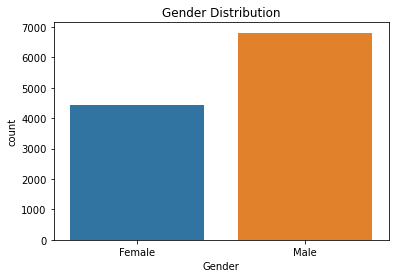

In [208]:
sns.countplot(x="Gender", data=df)#males are more than females
plt.title("Gender Distribution")


<AxesSubplot:xlabel='Churn', ylabel='count'>

Text(0.5, 1.0, 'churn Distribution')

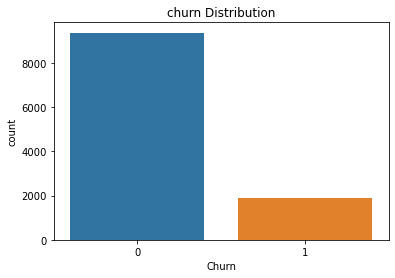

In [209]:
sns.countplot(x="Churn", data=df)
plt.title("churn Distribution")

<AxesSubplot:xlabel='Account_user_count', ylabel='count'>

Text(0.5, 1.0, 'Account_user Distribution')

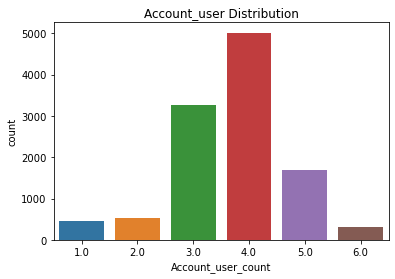

In [210]:
sns.countplot(x="Account_user_count", data=df)
plt.title("Account_user Distribution")

<AxesSubplot:xlabel='account_segment', ylabel='count'>

Text(0.5, 1.0, 'account segment Distribution')

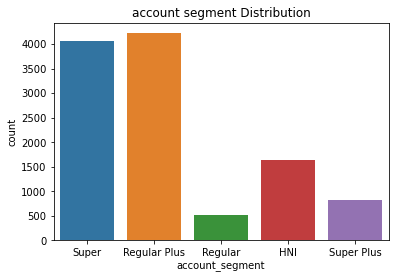

In [211]:
sns.countplot(x="account_segment", data=df)
plt.title("account segment Distribution")

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

Text(0.5, 1.0, 'Marital_Status Distribution')

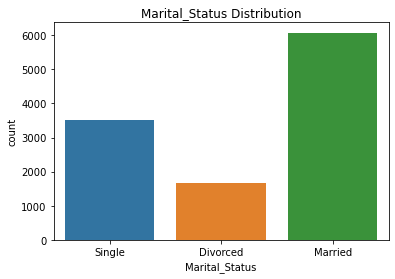

In [212]:
sns.countplot(x="Marital_Status", data=df)
plt.title("Marital_Status Distribution")

<AxesSubplot:xlabel='Login_device', ylabel='count'>

Text(0.5, 1.0, 'Login_device Distribution')

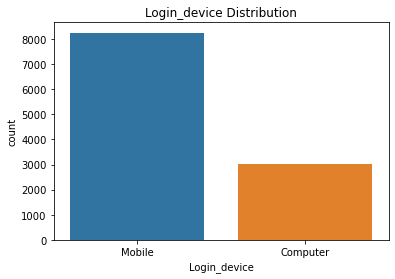

In [213]:
sns.countplot(x="Login_device", data=df)
plt.title("Login_device Distribution")

<AxesSubplot:xlabel='Payment', ylabel='count'>

Text(0.5, 1.0, 'Payment Distribution')

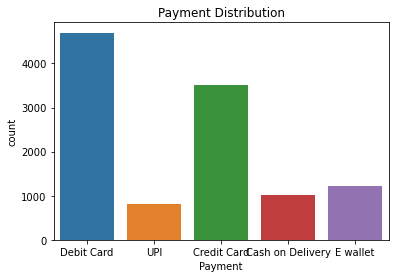

In [214]:
sns.countplot(x="Payment", data=df)
plt.title("Payment Distribution")

<AxesSubplot:xlabel='Service_Score', ylabel='count'>

Text(0.5, 1.0, 'Service_Score Distribution')

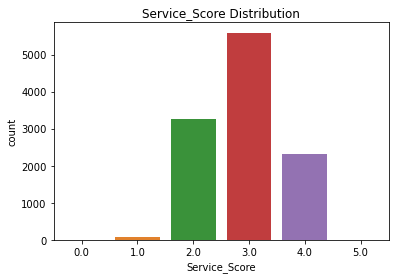

In [215]:
sns.countplot(x="Service_Score", data=df)
plt.title("Service_Score Distribution")

<AxesSubplot:xlabel='Complain_ly', ylabel='count'>

Text(0.5, 1.0, 'Complain_ly Distribution')

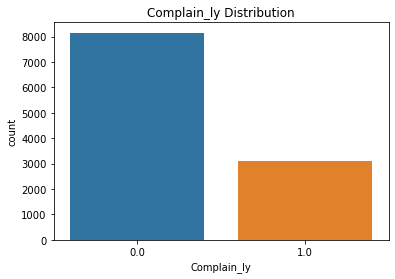

In [216]:
sns.countplot(x="Complain_ly", data=df)
plt.title("Complain_ly Distribution")


## Checking for Skewness

In [217]:
df.skew().sort_values(ascending=False) 

rev_per_month              9.442998
cashback                   8.966075
Tenure                     3.940286
coupon_used_for_payment    2.575680
Churn                      1.772606
CC_Contacted_LY            1.434272
Day_Since_CC_connect       1.321646
Complain_ly                1.000723
City_Tier                  0.752913
rev_growth_yoy             0.752789
Service_Score              0.000405
CC_Agent_Score            -0.141386
Account_user_count        -0.434010
dtype: float64

## Checking for Outliers

In [218]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


Text(0.5, 1.0, 'Tenure HISTPLOT')

Text(0.5, 1.0, 'Tenure Boxplot')

Text(0.5, 1.0, 'CC_Contacted_LY HISTPLOT')

Text(0.5, 1.0, 'CC_Contacted_LY Boxplot')

Text(0.5, 1.0, 'rev_per_month HISTPLOT')

Text(0.5, 1.0, 'rev_per_month Boxplot')

Text(0.5, 1.0, 'Day_Since_CC_connect HISTPLOT')

Text(0.5, 1.0, 'Day_Since_CC_connect Boxplot')

Text(0.5, 1.0, 'cashback HISTPLOT')

Text(0.5, 1.0, 'cashback Boxplot')

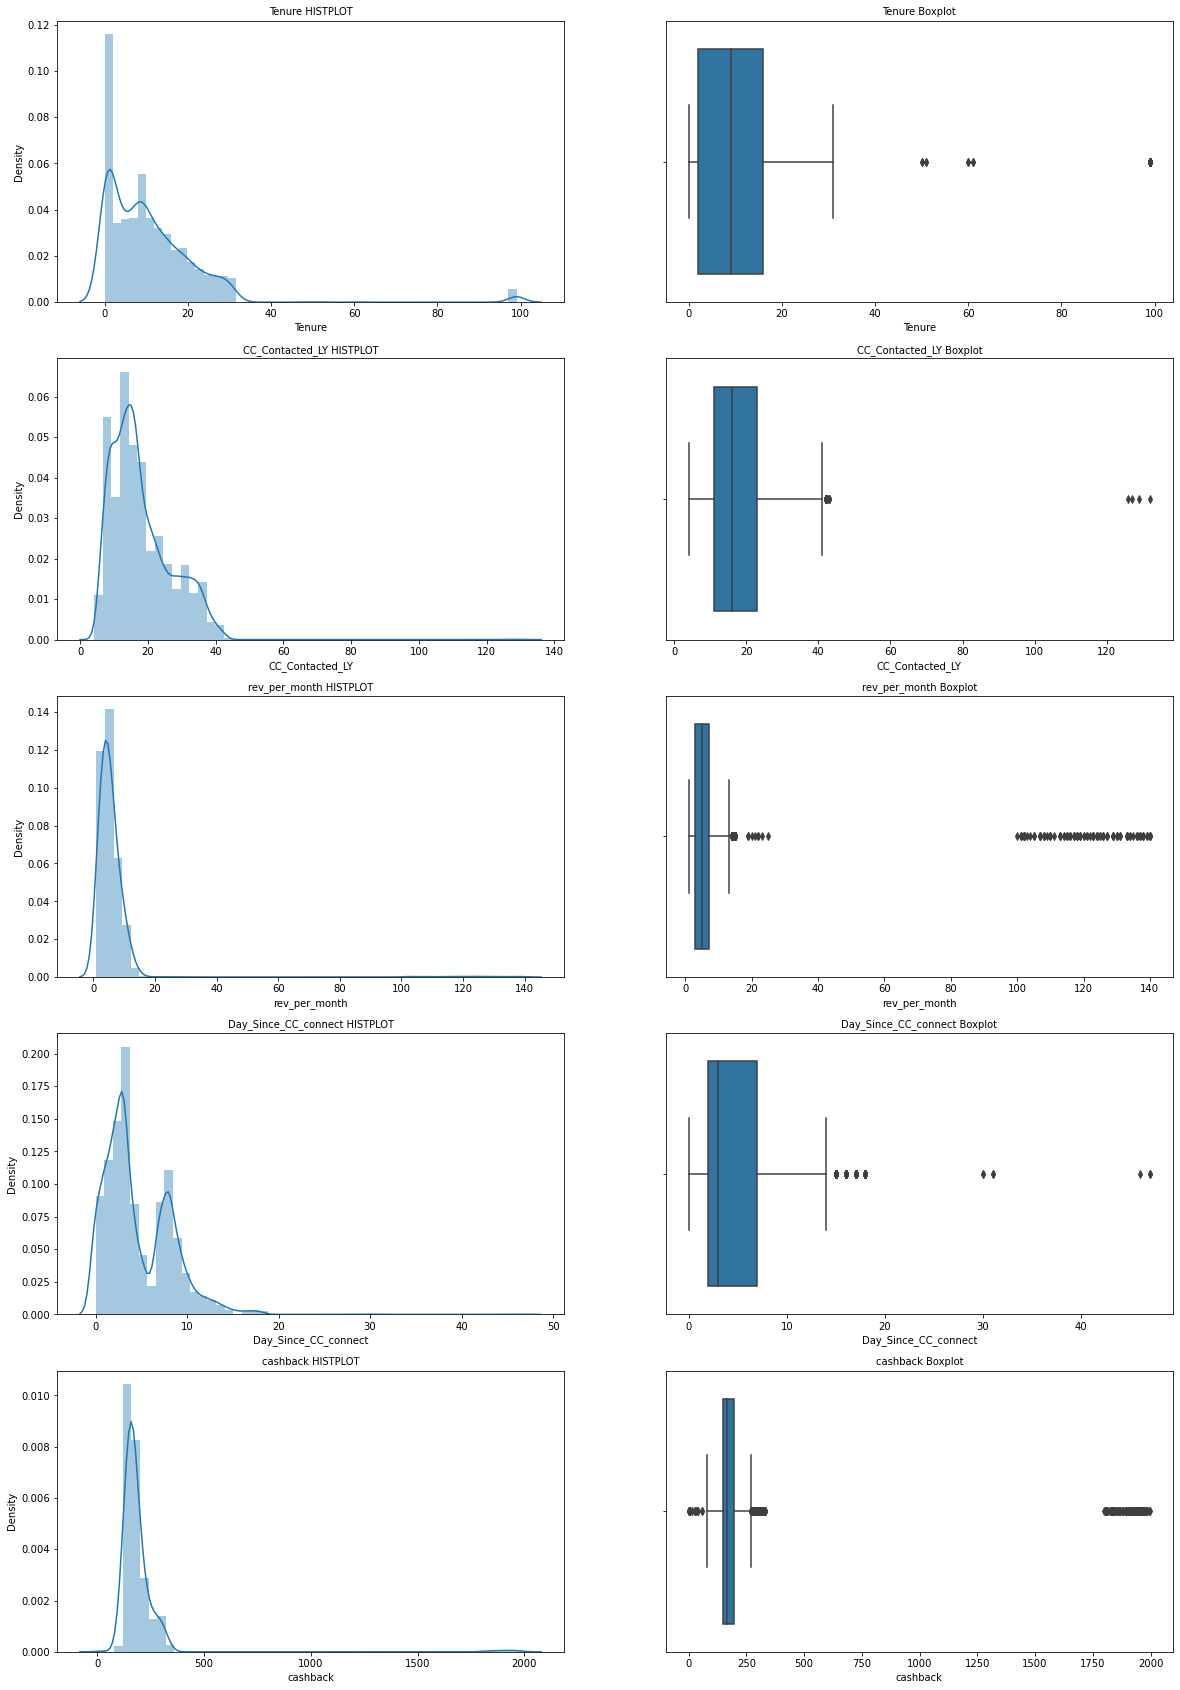

In [219]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20, 30)


a = sns.distplot(df['Tenure'] , ax=axes[0][0])
a.set_title("Tenure HISTPLOT",fontsize=10)

a = sns.boxplot(df['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title("Tenure Boxplot",fontsize=10)

a = sns.distplot(df['CC_Contacted_LY'] , ax=axes[1][0])
a.set_title("CC_Contacted_LY HISTPLOT",fontsize=10)

a = sns.boxplot(df['CC_Contacted_LY'] , orient = "v" , ax=axes[1][1])
a.set_title("CC_Contacted_LY Boxplot",fontsize=10)


a = sns.distplot(df['rev_per_month'] , ax=axes[2][0])
a.set_title("rev_per_month HISTPLOT",fontsize=10)

a = sns.boxplot(df['rev_per_month'] , orient = "v" , ax=axes[2][1])
a.set_title("rev_per_month Boxplot",fontsize=10)



a = sns.distplot(df['Day_Since_CC_connect'] , ax=axes[3][0])
a.set_title("Day_Since_CC_connect HISTPLOT",fontsize=10)

a = sns.boxplot(df['Day_Since_CC_connect'] , orient = "v" , ax=axes[3][1])
a.set_title("Day_Since_CC_connect Boxplot",fontsize=10)



a = sns.distplot(df['cashback'] , ax=axes[4][0])
a.set_title("cashback HISTPLOT",fontsize=10)

a = sns.boxplot(df['cashback'] , orient = "v" , ax=axes[4][1])
a.set_title("cashback Boxplot",fontsize=10)




Text(0.5, 1.0, 'City_Tier HISTPLOT')

Text(0.5, 1.0, 'Service_Score Boxplot')

Text(0.5, 1.0, 'Account_user_count HISTPLOT')

Text(0.5, 1.0, 'CC_Agent_Score Boxplot')

Text(0.5, 1.0, 'rev_per_month HISTPLOT')

Text(0.5, 1.0, 'Complain_ly Boxplot')

Text(0.5, 1.0, 'rev_growth_yoy HISTPLOT')

Text(0.5, 1.0, 'coupon_used_for_payment Boxplot')

Text(0.5, 1.0, 'coupon_used_for_payment HISTPLOT')

Text(0.5, 1.0, 'cashback Boxplot')

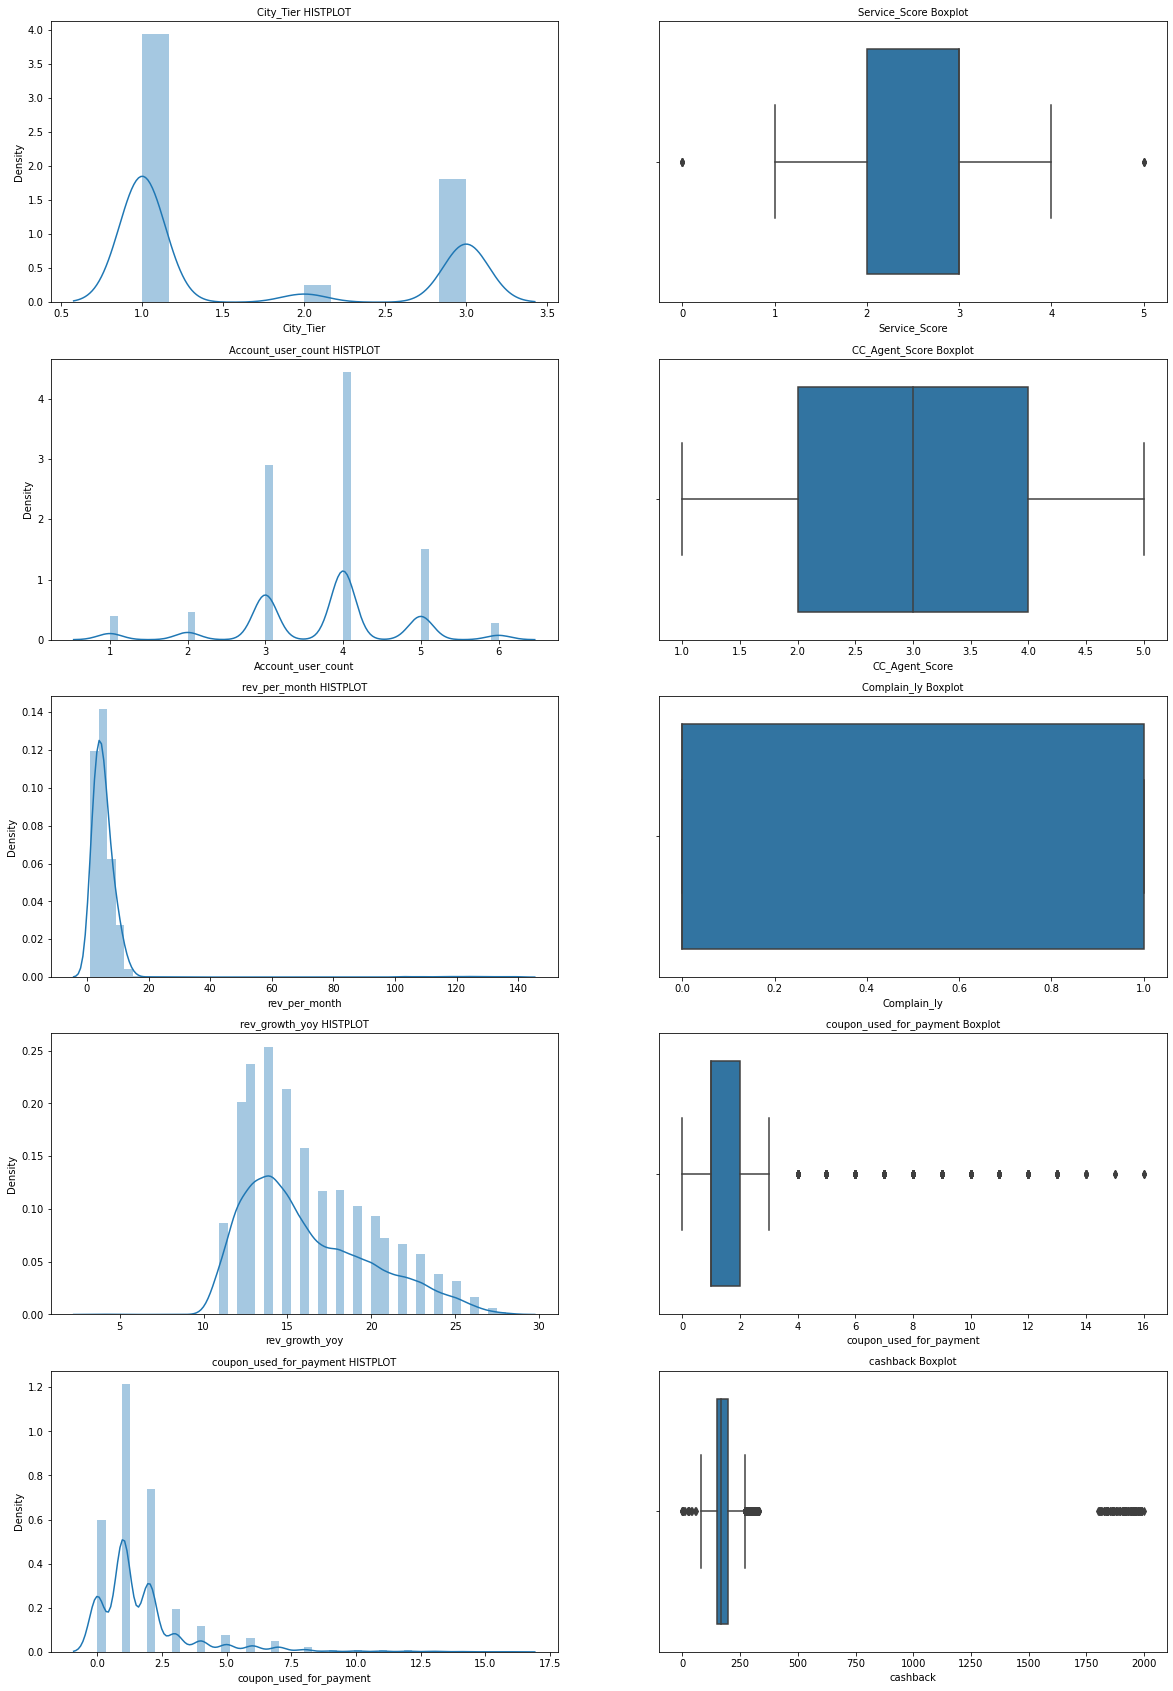

In [220]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20, 30)


a = sns.distplot(df['City_Tier'] , ax=axes[0][0])
a.set_title("City_Tier HISTPLOT",fontsize=10)

a = sns.boxplot(df['Service_Score'] , orient = "v" , ax=axes[0][1])
a.set_title("Service_Score Boxplot",fontsize=10)

a = sns.distplot(df['Account_user_count'] , ax=axes[1][0])
a.set_title("Account_user_count HISTPLOT",fontsize=10)

a = sns.boxplot(df['CC_Agent_Score'] , orient = "v" , ax=axes[1][1])
a.set_title("CC_Agent_Score Boxplot",fontsize=10)


a = sns.distplot(df['rev_per_month'] , ax=axes[2][0])
a.set_title("rev_per_month HISTPLOT",fontsize=10)

a = sns.boxplot(df['Complain_ly'] , orient = "v" , ax=axes[2][1])
a.set_title("Complain_ly Boxplot",fontsize=10)



a = sns.distplot(df['rev_growth_yoy'] , ax=axes[3][0])
a.set_title("rev_growth_yoy HISTPLOT",fontsize=10)

a = sns.boxplot(df['coupon_used_for_payment'] , orient = "v" , ax=axes[3][1])
a.set_title("coupon_used_for_payment Boxplot",fontsize=10)



a = sns.distplot(df['coupon_used_for_payment'] , ax=axes[4][0])
a.set_title("coupon_used_for_payment HISTPLOT",fontsize=10)

a = sns.boxplot(df['cashback'] , orient = "v" , ax=axes[4][1])
a.set_title("cashback Boxplot",fontsize=10)


In [221]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [222]:
df.cashback.value_counts()

165.25     478
155.62      10
152.28       9
154.73       9
145.08       9
          ... 
154.23       1
182.94       1
1829.00      1
175.17       1
235.32       1
Name: cashback, Length: 5692, dtype: int64

In [223]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lr,ur=remove_outlier(df["Tenure"])
df["Tenure1"]=np.where(df["Tenure"]>ur,ur,df["Tenure"])
df["Tenure1"]=np.where(df["Tenure"]<lr,lr,df["Tenure"])


df["rev_per_month1"]=np.where(df["rev_per_month"]>ur,ur,df["rev_per_month"])
df["rev_per_month1"]=np.where(df["rev_per_month"]<lr,lr,df["rev_per_month"])

df["cashback1"]=np.where(df["cashback"]>ur,ur,df["cashback"])
df["cashback1"]=np.where(df["cashback"]<lr,lr,df["cashback"])




### After removing Outliers

plt.boxplot(df['Tenure'])


plt.boxplot(df['rev_per_month'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1e02f409c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1e030544340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e02f4098b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e030544a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e030544d60>],
 'means': []}

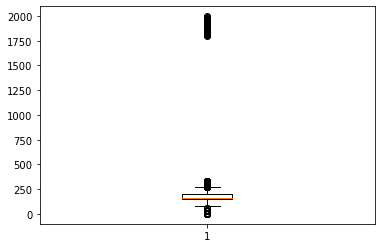

In [224]:
plt.boxplot(df['cashback'])#even after removing outliers there remain values which are outside the upper and lower limit ranges

df.cashback.value_counts()

df.info()

### Bivariate Analysis

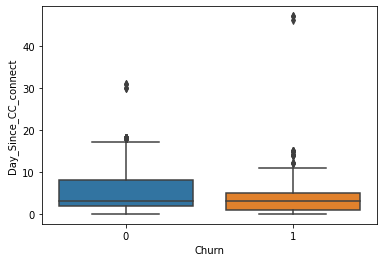

In [225]:
sns.boxplot(df['Churn'],df['Day_Since_CC_connect']);

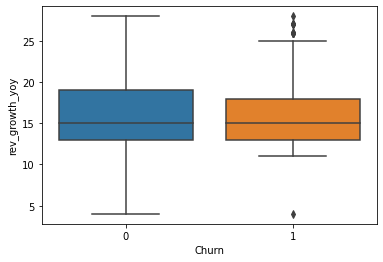

In [226]:
sns.boxplot(df['Churn'],df['rev_growth_yoy']);

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='Churn', ylabel='cashback'>

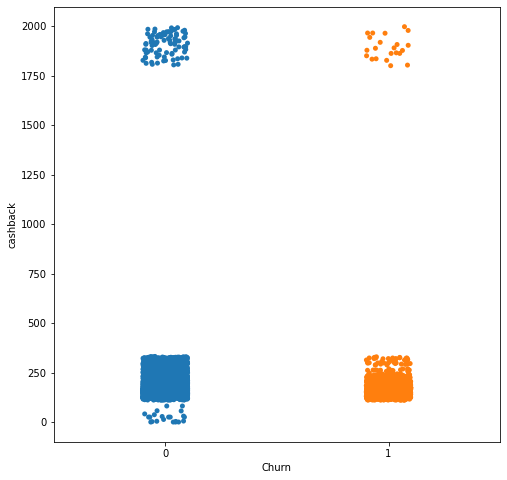

In [227]:
plt.figure(figsize=(8,8))
sns.stripplot(df["Churn"], df['cashback'], jitter=True) 
plt.show()

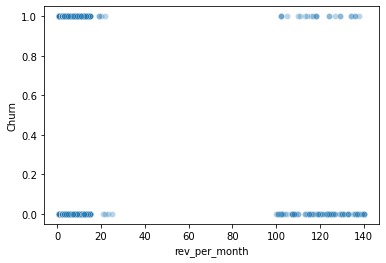

In [228]:
sns.scatterplot(x='rev_per_month', y="Churn", data=df, alpha=0.3);

## Checking pairwise distribution of the continuous variables

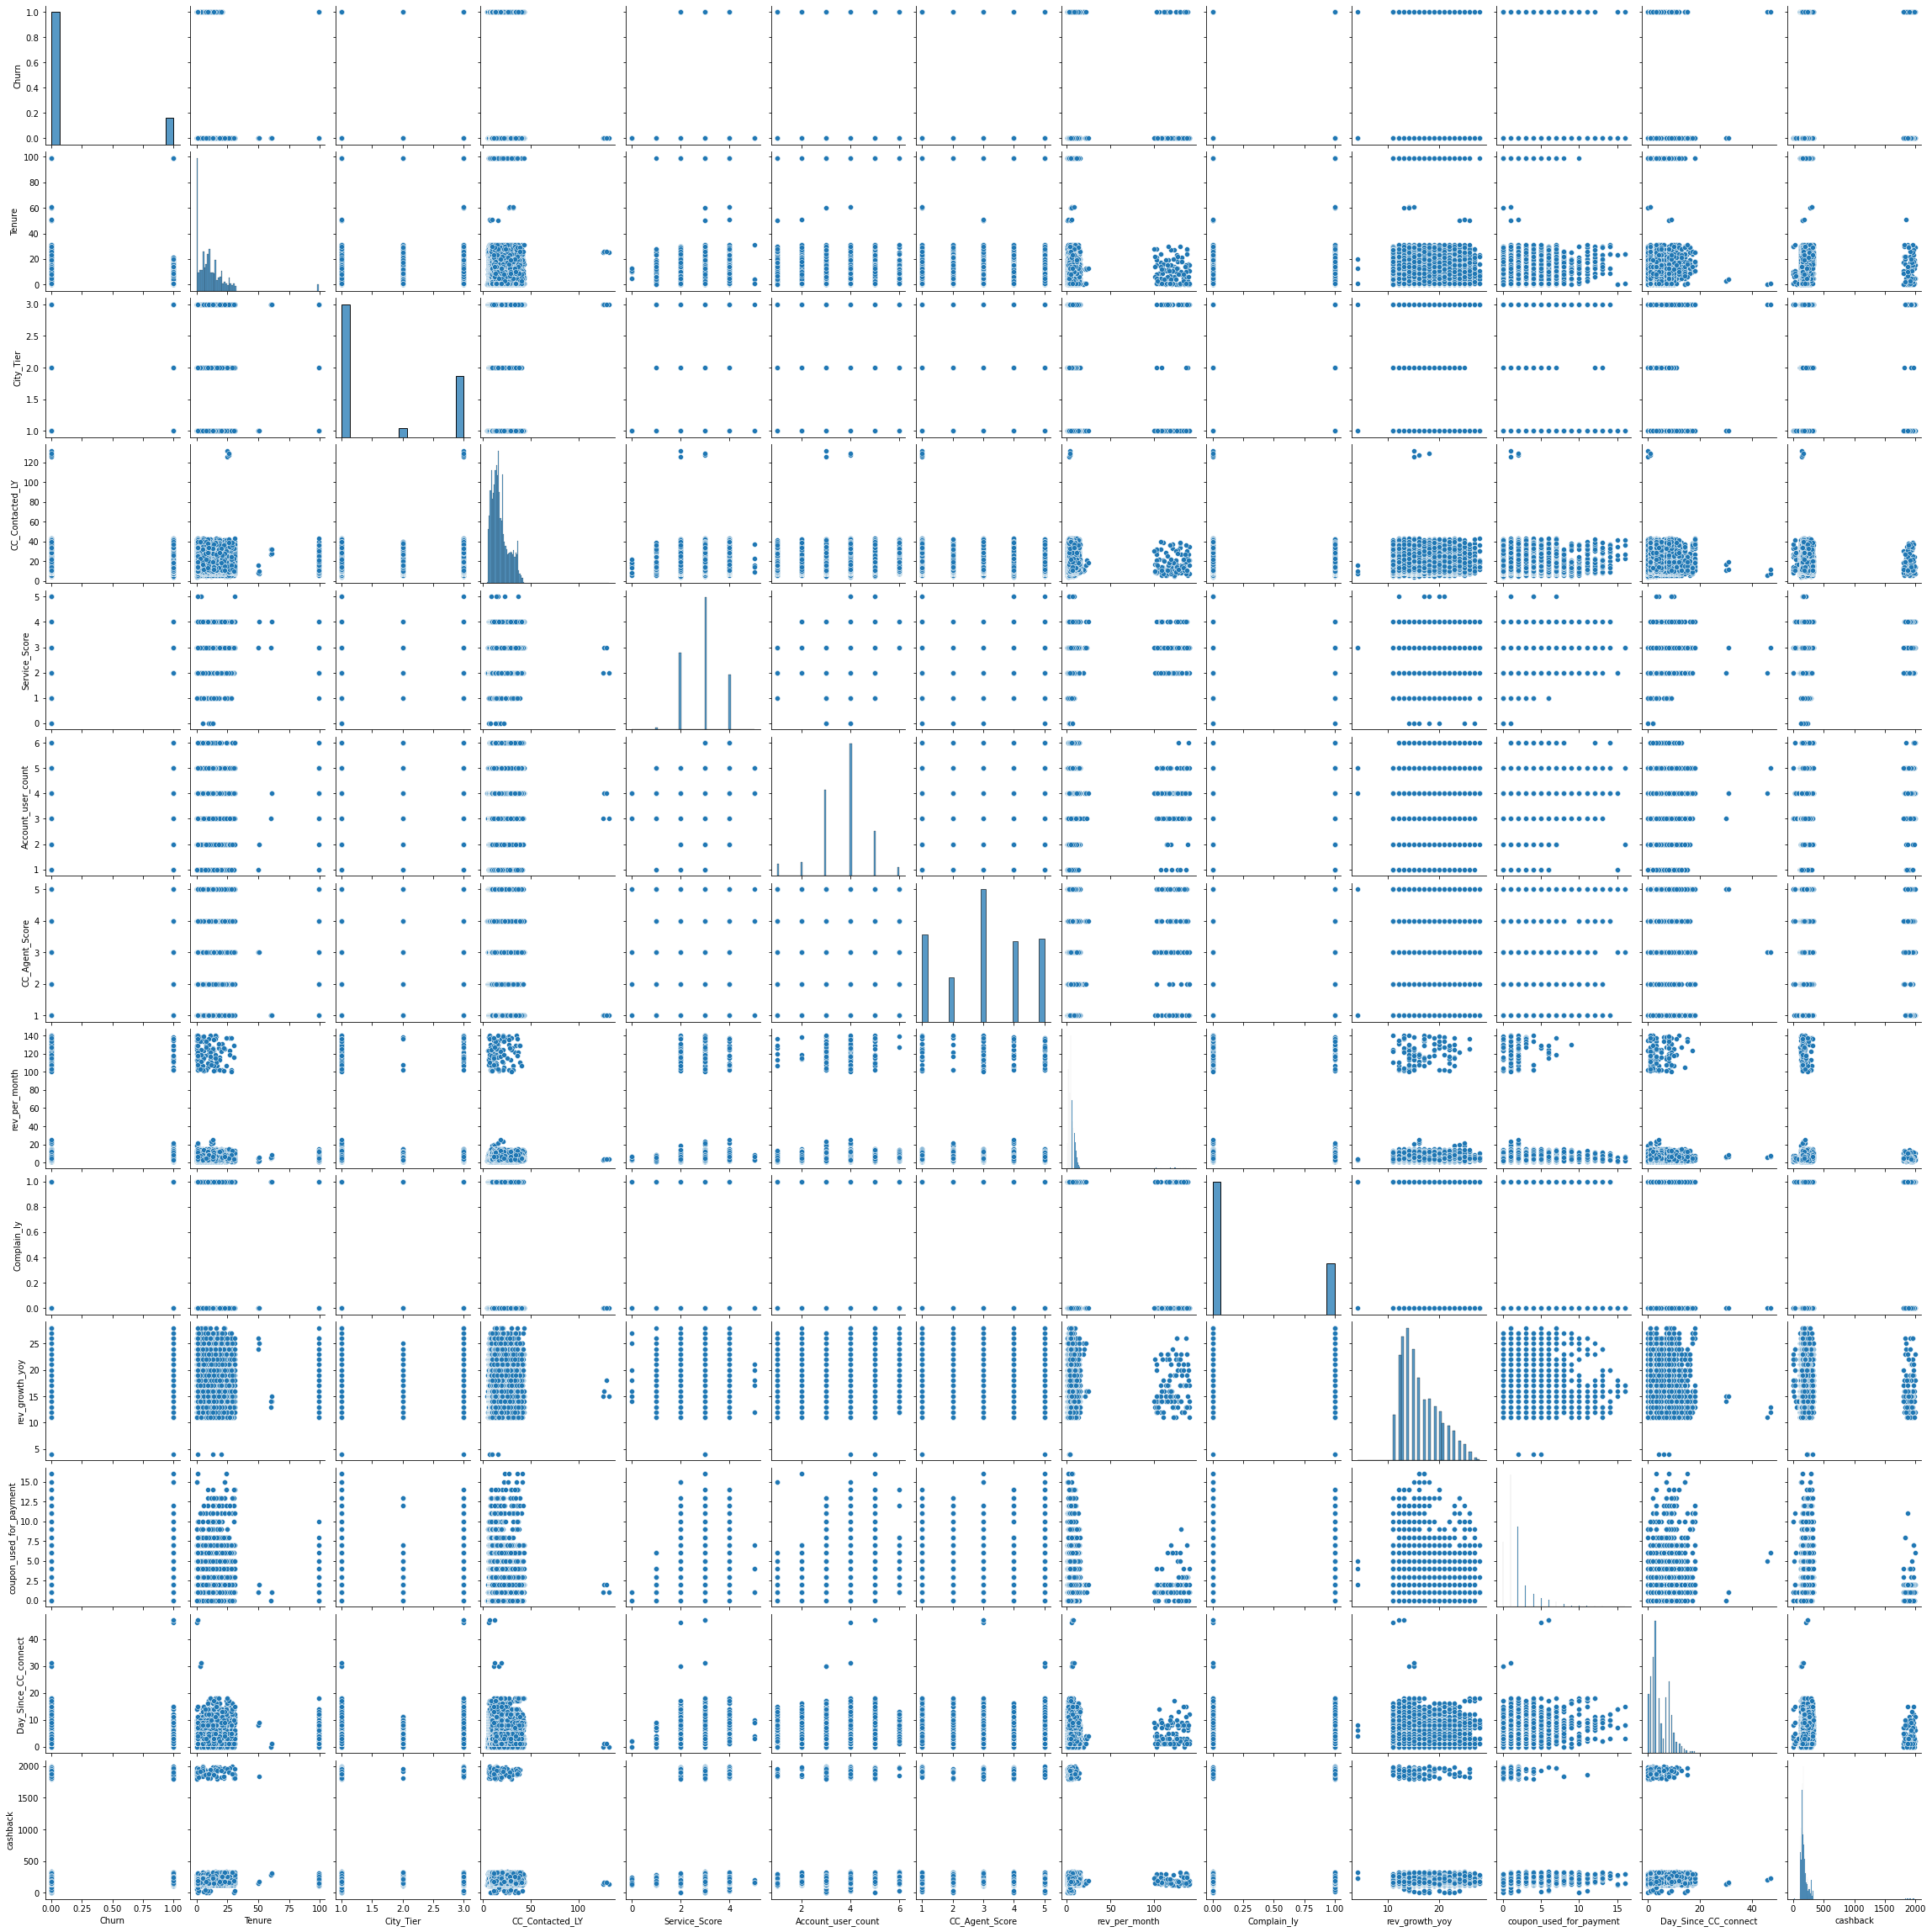

In [229]:
sns.pairplot(df)

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

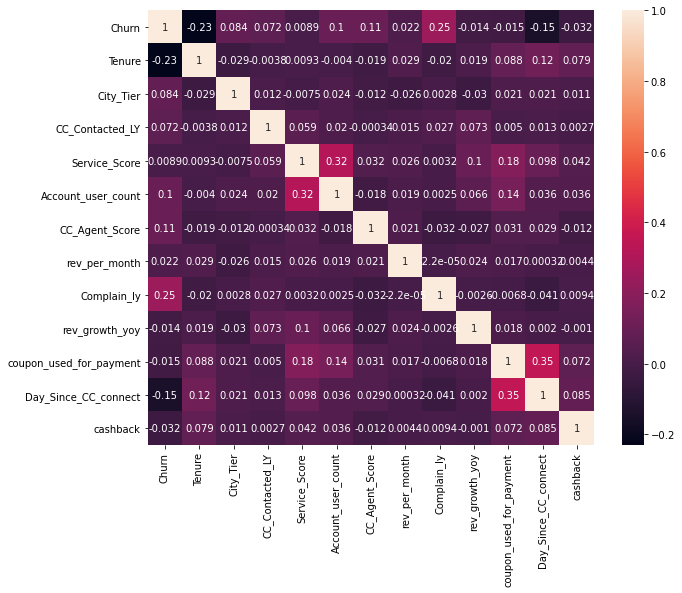

In [230]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [231]:
correlations = df.corr()
print(correlations)

                            Churn    Tenure  City_Tier  CC_Contacted_LY  \
Churn                    1.000000 -0.230692   0.083853         0.071676   
Tenure                  -0.230692  1.000000  -0.029076        -0.003787   
City_Tier                0.083853 -0.029076   1.000000         0.011980   
CC_Contacted_LY          0.071676 -0.003787   0.011980         1.000000   
Service_Score            0.008936  0.009286  -0.007489         0.059453   
Account_user_count       0.104534 -0.004047   0.023905         0.020288   
CC_Agent_Score           0.105165 -0.019474  -0.012175        -0.000338   
rev_per_month            0.022125  0.028538  -0.026387         0.015033   
Complain_ly              0.246350 -0.019804   0.002799         0.026815   
rev_growth_yoy          -0.013838  0.019049  -0.029874         0.072540   
coupon_used_for_payment -0.014777  0.088450   0.020650         0.005001   
Day_Since_CC_connect    -0.145413  0.122386   0.021186         0.012781   
cashback                -

In [232]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='Churn', ylabel='cashback'>

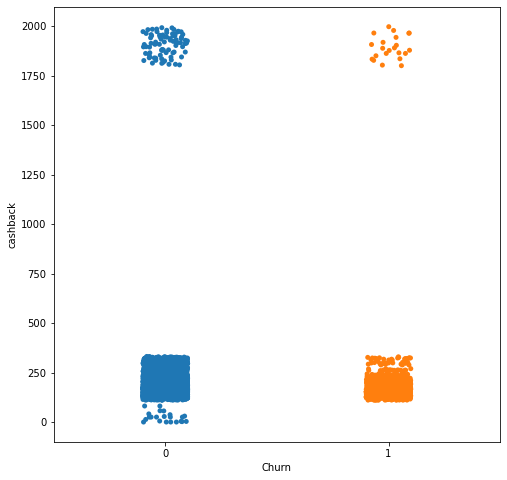

In [233]:
plt.figure(figsize=(8,8))
sns.stripplot(df["Churn"], df['cashback'], jitter=True) 
plt.show()

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='Churn', ylabel='Day_Since_CC_connect'>

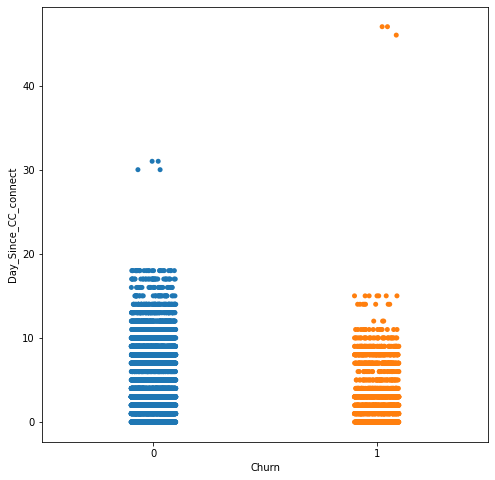

In [234]:
plt.figure(figsize=(8,8))
sns.stripplot(df["Churn"], df['Day_Since_CC_connect'], jitter=True) 
plt.show()

In [235]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
formula='Churn ~ C(Service_Score) + C(CC_Agent_Score) + C(City_Tier) + C(Payment) + C(Gender) + C(account_segment) + C(Marital_Status) + C(Complain_ly) + C(Login_device) + C(Account_user_count)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                            df       sum_sq    mean_sq           F  \
C(Service_Score)           5.0     2.576731   0.515346    4.532847   
C(CC_Agent_Score)          4.0    19.453903   4.863476   42.777834   
C(City_Tier)               2.0    11.646862   5.823431   51.221344   
C(Payment)                 4.0     9.067115   2.266779   19.937980   
C(Gender)                  1.0     1.628812   1.628812   14.326597   
C(account_segment)         4.0    94.232833  23.558208  207.211708   
C(Marital_Status)          2.0    41.848934  20.924467  184.046024   
C(Complain_ly)             1.0    95.376375  95.376375  838.905116   
C(Login_device)            1.0     4.710175   4.710175   41.429442   
C(Account_user_count)      5.0    19.447381   3.889476   34.210793   
Residual               11230.0  1276.755461   0.113691         NaN   

                              PR(>F)  
C(Service_Score)        3.947019e-04  
C(CC_Agent_Score)       1.134181e-35  
C(City_Tier)            7.173034e-23  
C(P

Above is ANOVA test for Categorical variables, all variables P values is less than 0.05 So all variables are important in deciding churn rate probability.

### K-Prototypes(Clustering)
The k-means based methods are efficient for processing large data sets, but they are often limited to numeric data. Kmeans optimize a cost function defined on the Euclidean distance
measure between data points and means of clusters. Minimizing the cost function by
calculating means limits their use to numeric data.

This is where K-Prototype shines. When applied to numeric data the algorithm is identical to k-means. For categorical data algorithm uses a simple matching dissimilarity measure
, replaces the means of clusters with modes, and uses a frequency-based method to
update modes in the clustering process to minimize the clustering cost function.

In [236]:
pip install kmodes

In [237]:
from kmodes.kprototypes import KPrototypes

In [238]:
df1=df.drop(['Churn'], axis=1)

In [239]:
df1.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
AccountID,,,,,,,,,,,,,,,,,
20000,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
20001,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
20002,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,165.25,Mobile
20003,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
20004,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile


In [240]:
df1_array=df1.values

In [241]:
df1_array

array([[4.0, 3.0, 6.0, ..., 5.0, 159.93, 'Mobile'],
       [0.0, 1.0, 8.0, ..., 0.0, 120.9, 'Mobile'],
       [0.0, 1.0, 30.0, ..., 3.0, 165.25, 'Mobile'],
       ...,
       [1.0, 1.0, 14.0, ..., 4.0, 191.42, 'Mobile'],
       [23.0, 3.0, 11.0, ..., 9.0, 179.9, 'Computer'],
       [8.0, 1.0, 22.0, ..., 3.0, 175.04, 'Mobile']], dtype=object)

In [242]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11260 entries, 20000 to 31259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  float64
 2   CC_Contacted_LY          11260 non-null  float64
 3   Payment                  11260 non-null  object 
 4   Gender                   11260 non-null  object 
 5   Service_Score            11260 non-null  float64
 6   Account_user_count       11260 non-null  float64
 7   account_segment          11260 non-null  object 
 8   CC_Agent_Score           11260 non-null  float64
 9   Marital_Status           11260 non-null  object 
 10  rev_per_month            11260 non-null  float64
 11  Complain_ly              11260 non-null  float64
 12  rev_growth_yoy           11260 non-null  float64
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day_Since_CC_conne

In [243]:
df1_array[:,0]=df1_array[:,0].astype(float)
df1_array[:,2]=df1_array[:,2].astype(float)
df1_array[:,10]=df1_array[:,10].astype(float)
df1_array[:,12]=df1_array[:,12].astype(float)
df1_array[:,14]=df1_array[:,14].astype(float)
df1_array[:,15]=df1_array[:,15].astype(float)

In [244]:
df1_array

array([[4.0, 3.0, 6.0, ..., 5.0, 159.93, 'Mobile'],
       [0.0, 1.0, 8.0, ..., 0.0, 120.9, 'Mobile'],
       [0.0, 1.0, 30.0, ..., 3.0, 165.25, 'Mobile'],
       ...,
       [1.0, 1.0, 14.0, ..., 4.0, 191.42, 'Mobile'],
       [23.0, 3.0, 11.0, ..., 9.0, 179.9, 'Computer'],
       [8.0, 1.0, 22.0, ..., 3.0, 175.04, 'Mobile']], dtype=object)

In [245]:
kproto=KPrototypes(n_clusters=3,verbose=2,max_iter=20)
clusters=kproto.fit_predict(df1_array,categorical=[1,3,4,5,6,7,8,9,11,13,16])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1189, ncost: 236645786.20506328
Run: 1, iteration: 2/20, moves: 665, ncost: 32384476.42334151
Run: 1, iteration: 3/20, moves: 4, ncost: 32377850.149174955
Run: 1, iteration: 4/20, moves: 0, ncost: 32377850.149174955
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 7402, ncost: 300936959.3768269
Run: 2, iteration: 2/20, moves: 2417, ncost: 270260060.59360045
Run: 2, iteration: 3/20, moves: 1200, ncost: 65475924.72692849
Run: 2, iteration: 4/20, moves: 56, ncost: 33243318.1342587
Run: 2, iteration: 5/20, moves: 0, ncost: 33243318.1342587
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 1038, ncost: 15172661.18507113
Run: 3, iteration: 2/20, moves: 72, ncost: 15164688.793567043
Run: 3, iteration: 3/20, moves: 28, ncost: 15163678.583028167
Run: 3, iteratio

In [246]:
print(kproto.cluster_centroids_)

[['17.936755270394134' '18.065536205316224' '7.102199816681943'
  '16.290559120073326' '6.489000916590284' '260.7768285976167' '1.0'
  'Debit Card' 'Male' '3.0' '4.0' 'HNI' '3.0' 'Married' '0.0' '1.0'
  'Mobile']
 ['10.296296296296296' '17.89814814814815' '5.314814814814815'
  '16.00925925925926' '4.305555555555555' '1903.7962962962977' '1.0'
  'Debit Card' 'Male' '3.0' '4.0' 'Regular Plus' '3.0' 'Married' '0.0'
  '1.0' 'Mobile']
 ['9.30334448160535' '17.797212931995542' '6.075139353400223'
  '16.171571906354515' '4.12051282051282' '158.34335897435977' '1.0'
  'Debit Card' 'Male' '3.0' '4.0' 'Regular Plus' '3.0' 'Married' '0.0'
  '1.0' 'Mobile']]


In [247]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [248]:
cluster_dict

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [249]:
df['cluster']=cluster_dict

In [250]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,cluster
AccountID,,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile,2
20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile,2
20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,165.25,Mobile,2
20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile,2
20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile,2


In [251]:
df.cluster.value_counts()

2    8970
0    2182
1     108
Name: cluster, dtype: int64

In [252]:
df[df['cluster']==0].head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,cluster
AccountID,,,,,,,,,,,,,,,,,,,
20010,1,4.0,1.0,18.0,Cash on Delivery,Female,2.0,3.0,Regular,3.0,Divorced,2.0,0.0,12.0,9.0,8.0,295.45,Mobile,0
20040,0,23.0,1.0,17.0,Debit Card,Female,2.0,3.0,Regular,4.0,Single,4.0,0.0,15.0,2.0,4.0,299.26,Mobile,0
20061,0,13.0,1.0,10.0,Credit Card,Female,2.0,3.0,Regular,3.0,Divorced,2.0,0.0,14.0,0.0,9.0,290.33,Mobile,0
20062,0,28.0,1.0,20.0,Credit Card,Male,3.0,2.0,Regular,4.0,Single,9.0,0.0,11.0,0.0,15.0,287.22,Mobile,0
20064,0,24.0,1.0,9.0,Credit Card,Female,3.0,3.0,Super Plus,4.0,Single,4.0,0.0,18.0,0.0,0.0,237.34,Mobile,0


In [253]:
df[df['cluster']==1].head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,cluster
AccountID,,,,,,,,,,,,,,,,,,,
20031,0,0.0,1.0,13.0,Credit Card,Male,2.0,4.0,Super,3.0,Divorced,3.0,0.0,17.0,1.0,0.0,1974.0,Mobile,1
20119,0,18.0,1.0,6.0,UPI,Male,3.0,2.0,Regular,2.0,Divorced,1.0,0.0,11.0,1.0,7.0,1955.0,Mobile,1
20191,0,22.0,1.0,6.0,Cash on Delivery,Male,2.0,4.0,Super Plus,3.0,Single,8.0,1.0,12.0,1.0,7.0,1813.0,Mobile,1
20226,0,5.0,1.0,8.0,Credit Card,Male,3.0,3.0,Regular Plus,4.0,Divorced,2.0,0.0,13.0,0.0,7.0,1862.0,Mobile,1
20276,0,29.0,3.0,12.0,Debit Card,Male,2.0,2.0,Super Plus,5.0,Divorced,10.0,0.0,11.0,2.0,7.0,1982.0,Computer,1


In [254]:
df[df['cluster']==2].head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,cluster
AccountID,,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile,2
20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile,2
20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,165.25,Mobile,2
20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile,2
20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile,2


In [255]:
c0=df[df['cluster']==0]
c1=df[df['cluster']==1]
c2=df[df['cluster']==2]

In [256]:
c0.Churn.value_counts()
c1.Churn.value_counts()
c2.Churn.value_counts()

0    1983
1     199
Name: Churn, dtype: int64

0    86
1    22
Name: Churn, dtype: int64

0    7295
1    1675
Name: Churn, dtype: int64

In [257]:
c0.Login_device.value_counts()
c0.Marital_Status.value_counts()
c0.Gender.value_counts()
c0.Service_Score.value_counts()
c0.account_segment.value_counts()
c0.Marital_Status.value_counts()
c0.Complain_ly.value_counts()
c0.coupon_used_for_payment.value_counts()
c0.cashback.sum()


Mobile      1641
Computer     541
Name: Login_device, dtype: int64

Married     1278
Single       534
Divorced     370
Name: Marital_Status, dtype: int64

Male      1258
Female     924
Name: Gender, dtype: int64

3.0    1121
4.0     524
2.0     517
1.0      16
0.0       4
Name: Service_Score, dtype: int64

HNI             789
Super Plus      772
Regular         494
Super           110
Regular Plus     17
Name: account_segment, dtype: int64

Married     1278
Single       534
Divorced     370
Name: Marital_Status, dtype: int64

0.0    1567
1.0     615
Name: Complain_ly, dtype: int64

1.0     688
2.0     505
0.0     257
3.0     200
4.0     151
5.0     100
6.0      71
7.0      59
8.0      36
9.0      22
11.0     20
10.0     20
13.0     19
12.0     18
14.0     12
15.0      2
16.0      2
Name: coupon_used_for_payment, dtype: int64

569015.04

In [258]:
c1.Login_device.value_counts()
c1.Marital_Status.value_counts()
c1.Gender.value_counts()
c1.Service_Score.value_counts()
c1.account_segment.value_counts()
c1.Marital_Status.value_counts()
c1.Complain_ly.value_counts()
c1.coupon_used_for_payment.value_counts()
c1.cashback.sum()

Mobile      88
Computer    20
Name: Login_device, dtype: int64

Married     59
Single      31
Divorced    18
Name: Marital_Status, dtype: int64

Male    108
Name: Gender, dtype: int64

3.0    45
2.0    36
4.0    27
Name: Service_Score, dtype: int64

Regular Plus    40
Super           39
Super Plus      12
HNI             12
Regular          5
Name: account_segment, dtype: int64

Married     59
Single      31
Divorced    18
Name: Marital_Status, dtype: int64

0.0    73
1.0    35
Name: Complain_ly, dtype: int64

1.0     39
2.0     33
0.0     21
4.0      5
3.0      3
8.0      2
7.0      2
5.0      1
6.0      1
11.0     1
Name: coupon_used_for_payment, dtype: int64

205610.0

In [259]:
c2.Login_device.value_counts()
c2.Marital_Status.value_counts()
c2.Gender.value_counts()
c2.Service_Score.value_counts()
c2.account_segment.value_counts()
c2.Marital_Status.value_counts()
c2.Complain_ly.value_counts()
c2.coupon_used_for_payment.value_counts()
c2.cashback.sum()

Mobile      6513
Computer    2457
Name: Login_device, dtype: int64

Married     4735
Single      2955
Divorced    1280
Name: Marital_Status, dtype: int64

Male      5446
Female    3524
Name: Gender, dtype: int64

3.0    4422
2.0    2698
4.0    1780
1.0      61
5.0       5
0.0       4
Name: Service_Score, dtype: int64

Regular Plus    4164
Super           3913
HNI              838
Super Plus        34
Regular           21
Name: account_segment, dtype: int64

Married     4735
Single      2955
Divorced    1280
Name: Marital_Status, dtype: int64

0.0    6509
1.0    2461
Name: Complain_ly, dtype: int64

1.0     3649
2.0     2118
0.0     1872
3.0      495
4.0      268
5.0      183
6.0      162
7.0      123
8.0       50
10.0      14
9.0       12
11.0       9
12.0       8
13.0       3
15.0       2
16.0       2
Name: coupon_used_for_payment, dtype: int64

1420339.93

### Variable transformation

### QQ Plots

In [260]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11260 entries, 20000 to 31259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_pa

In [262]:
df.cashback.value_counts()

165.25     478
155.62      10
152.28       9
154.73       9
145.08       9
          ... 
154.23       1
182.94       1
1829.00      1
175.17       1
235.32       1
Name: cashback, Length: 5692, dtype: int64

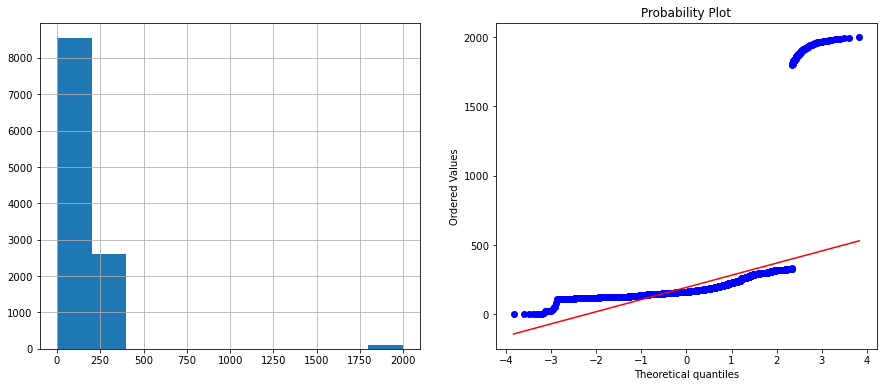

In [263]:
diagnostic_plots(df, 'cashback')

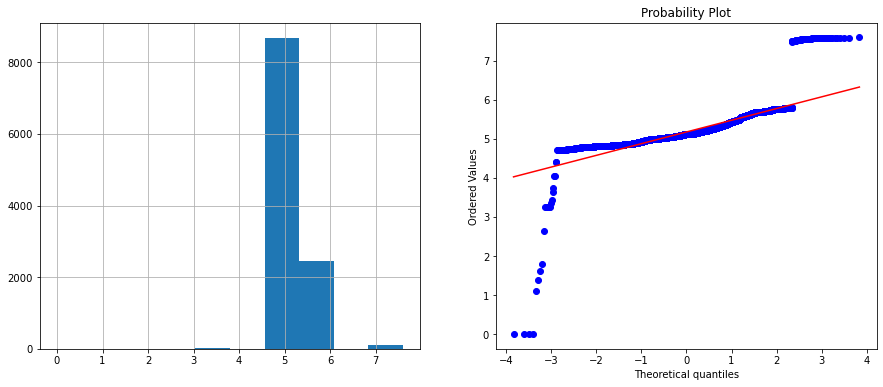

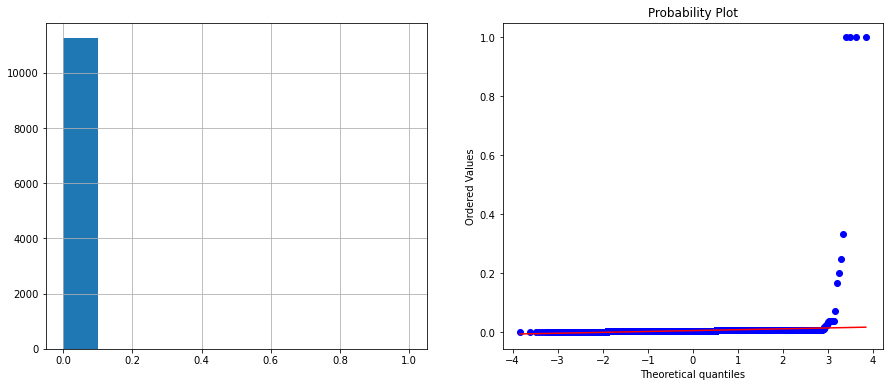

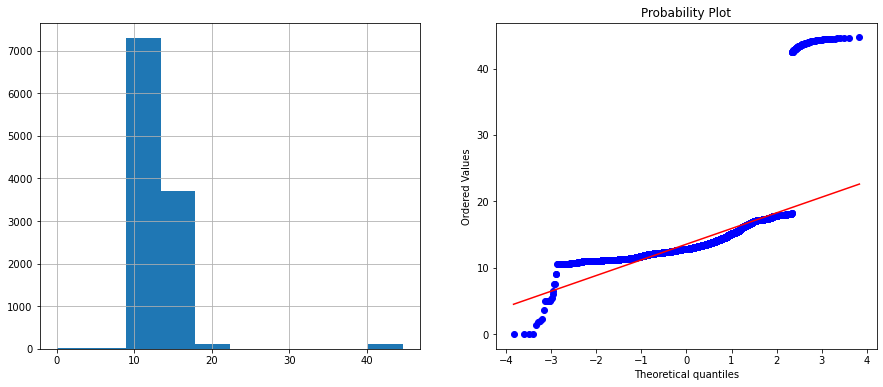

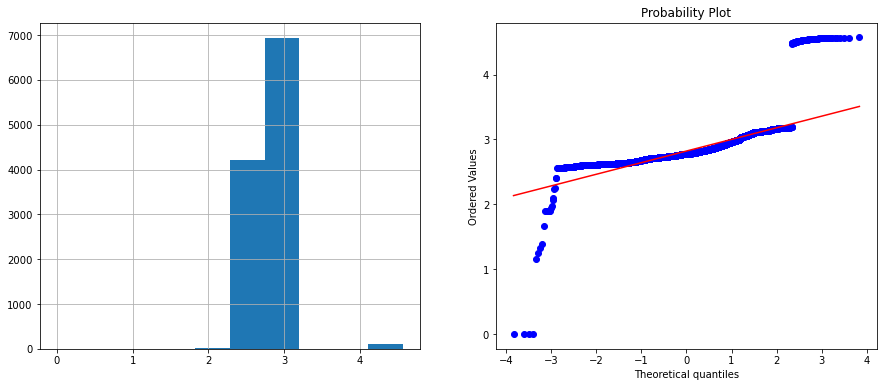

In [264]:
#exponential transformation seems to work good in this case as most of the points are centered 
#logarithamic transformation
df['Log_cashback']=np.log(df['cashback']+1)
#plt.title("cashback logarithamic transformation")
diagnostic_plots(df,'Log_cashback')
#reciprocal transformation
df['Rec_cashback']=1/(df['cashback']+1)
diagnostic_plots(df,'Rec_cashback')
#square root transformation
df['sqr_cashback']=df['cashback']**(1/2)
diagnostic_plots(df,'sqr_cashback')
#exponential transformation
df['Exp_cashback']=df['cashback']**(1/5)
diagnostic_plots(df,'Exp_cashback')

In [265]:
df.head(5)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,...,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,cluster,Log_cashback,Rec_cashback,sqr_cashback,Exp_cashback
AccountID,,,,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,...,11.0,1.0,5.0,159.93,Mobile,2,5.080969,0.006214,12.646343,2.759218
20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,...,15.0,0.0,0.0,120.90,Mobile,2,4.803201,0.008203,10.995454,2.609067
20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,...,14.0,0.0,3.0,165.25,Mobile,2,5.113493,0.006015,12.854960,2.777335
20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,...,23.0,0.0,3.0,134.07,Mobile,2,4.905793,0.007404,11.578860,2.663584
20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,...,11.0,1.0,3.0,129.60,Mobile,2,4.872139,0.007657,11.384200,2.645581


### Label Encoding

In [266]:
df['City_Tier']=np.where(df['City_Tier']== '1.0',1,df['City_Tier'])
df['City_Tier']=np.where(df["City_Tier"]== '2.0',2,df['City_Tier'])
df['City_Tier']=np.where(df['City_Tier']=='3.0',3,df['City_Tier'])

In [267]:
df['Service_Score']=np.where(df['Service_Score']== '1.0',1,df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score']== '2.0',2,df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score']== '3.0',3,df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score']== '4.0',4,df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score']== '5.0',5,df['Service_Score'])

In [268]:
df['CC_Agent_Score']=np.where(df['CC_Agent_Score']=='1.0',1,df['CC_Agent_Score'])
df['CC_Agent_Score']=np.where(df['CC_Agent_Score']=='2.0',2,df['CC_Agent_Score'])
df['CC_Agent_Score']=np.where(df['CC_Agent_Score']=='3.0',3,df['CC_Agent_Score'])
df['CC_Agent_Score']=np.where(df['CC_Agent_Score']=='4.0',4,df['CC_Agent_Score'])
df['CC_Agent_Score']=np.where(df['CC_Agent_Score']=='5.0',5,df['CC_Agent_Score'])

In [269]:
df['account_segment']=np.where(df['account_segment']== 'HNI',1,df['account_segment'])
df['account_segment']=np.where(df['account_segment']== 'Regular',2,df['account_segment'])
df['account_segment']=np.where(df['account_segment']== 'Regular Plus',3,df['account_segment'])
df['account_segment']=np.where(df['account_segment']== 'Super',4,df['account_segment'])
df['account_segment']=np.where(df['account_segment']== 'Super Plus',5,df['account_segment'])

In [270]:
df['Account_user_count']=np.where(df['Account_user_count']== '1.0',1,df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count']== '2.0',2,df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count']== '3.0',3,df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count']== '4.0',4,df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count']== '5.0',5,df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count']== '6.0',6,df['Account_user_count'])

In [271]:

for feature in df[['Payment','Marital_Status','Login_device']]: 
    print('\n')
    print('feature:',feature)
    print(pd.Categorical(df[feature].unique()))
    print(pd.Categorical(df[feature].unique()).codes)
    df[feature] = pd.Categorical(df[feature]).codes 





feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[2 4 1 0 3]


feature: Marital_Status
['Single', 'Divorced', 'Married']
Categories (3, object): ['Divorced', 'Married', 'Single']
[2 0 1]


feature: Login_device
['Mobile', 'Computer']
Categories (2, object): ['Computer', 'Mobile']
[1 0]


### One Hot encoding

In [272]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)
df['Complain_ly']=pd.get_dummies(df['Complain_ly'],drop_first=True)

In [273]:
df.head()
df.columns

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,...,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,cluster,Log_cashback,Rec_cashback,sqr_cashback,Exp_cashback
AccountID,,,,,,,,,,,,,,,,,,,,,
20000,1,4.0,3.0,6.0,2,0,3.0,3.0,4,2.0,...,11.0,1.0,5.0,159.93,1,2,5.080969,0.006214,12.646343,2.759218
20001,1,0.0,1.0,8.0,4,1,3.0,4.0,3,3.0,...,15.0,0.0,0.0,120.90,1,2,4.803201,0.008203,10.995454,2.609067
20002,1,0.0,1.0,30.0,2,1,2.0,4.0,3,3.0,...,14.0,0.0,3.0,165.25,1,2,5.113493,0.006015,12.854960,2.777335
20003,1,0.0,3.0,15.0,2,1,2.0,4.0,4,5.0,...,23.0,0.0,3.0,134.07,1,2,4.905793,0.007404,11.578860,2.663584
20004,1,0.0,1.0,12.0,1,1,2.0,3.0,3,5.0,...,11.0,1.0,3.0,129.60,1,2,4.872139,0.007657,11.384200,2.645581


Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device', 'cluster', 'Log_cashback', 'Rec_cashback',
       'sqr_cashback', 'Exp_cashback'],
      dtype='object')

In [274]:
X = df.drop(["Churn","Exp_cashback","sqr_cashback","Rec_cashback","Log_cashback","cluster"], axis=1)

y = df.pop("Churn")

# <h1>MODEL BUILDING<h1>


In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier


### Train Test Split

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [279]:
y_train.value_counts(1)
y_test.value_counts(1)
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

0    0.831769
1    0.168231
Name: Churn, dtype: float64

0    0.831261
1    0.168739
Name: Churn, dtype: float64

Number of rows and columns of the training set for the independent variables: (7882, 17)
Number of rows and columns of the training set for the dependent variable: (7882,)
Number of rows and columns of the test set for the independent variables: (3378, 17)
Number of rows and columns of the test set for the dependent variable: (3378,)


## LogisticRegression

In [280]:

log_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
log_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [281]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, log_model.coef_[0][idx]))

The coefficient for Tenure is -0.129580175954653
The coefficient for City_Tier is 0.30552487732623146
The coefficient for CC_Contacted_LY is 0.024020279533633962
The coefficient for Payment is -0.07670210392564134
The coefficient for Gender is 0.27593290315549823
The coefficient for Service_Score is -0.055929834284055166
The coefficient for Account_user_count is 0.31774295443462997
The coefficient for account_segment is -0.3035738097211624
The coefficient for CC_Agent_Score is 0.2855836413275595
The coefficient for Marital_Status is 0.564231355269898
The coefficient for rev_per_month is 0.011094691282218301
The coefficient for Complain_ly is 1.5768048144333913
The coefficient for rev_growth_yoy is -0.014793028700559416
The coefficient for coupon_used_for_payment is 0.11165096794587503
The coefficient for Day_Since_CC_connect is -0.12301659713455709
The coefficient for cashback is 6.445932270409412e-05
The coefficient for Login_device is -0.3606113050801607


In [282]:
# Let us check the intercept for the model

intercept = log_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3.2261794856265995


# using statsmodels

In [284]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn
AccountID,,,,,,,,,,,,,,,,,,
27580,11.0,1.0,22.0,2,1,0.0,4.0,4,5.0,1,7.0,0,15.0,1.0,2.0,163.88,1,0
25198,22.0,3.0,14.0,3,1,4.0,4.0,4,5.0,1,6.0,0,12.0,1.0,3.0,179.86,1,0
21929,15.0,1.0,14.0,2,1,3.0,3.0,2,1.0,1,2.0,0,13.0,5.0,9.0,284.30,0,0
23427,15.0,1.0,14.0,1,0,3.0,4.0,4,3.0,2,8.0,0,15.0,2.0,2.0,175.03,1,0
26249,0.0,1.0,22.0,1,0,3.0,5.0,4,4.0,0,6.0,0,15.0,1.0,0.0,149.77,1,1


In [285]:
data_train.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device', 'Churn'],
      dtype='object')

In [286]:
expr= 'Churn ~ Tenure + City_Tier + CC_Contacted_LY + Payment + Gender + Service_Score + Account_user_count + account_segment + CC_Agent_Score + Marital_Status + rev_per_month + Complain_ly + rev_growth_yoy + coupon_used_for_payment + Day_Since_CC_connect + cashback + Login_device'

In [287]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                 -0.203783
account_segment[T.2]       0.017860
account_segment[T.3]       0.102325
account_segment[T.4]      -0.065109
account_segment[T.5]      -0.047561
Tenure                    -0.005069
City_Tier                  0.055275
CC_Contacted_LY            0.003227
Payment                   -0.006490
Gender                     0.024912
Service_Score             -0.014028
Account_user_count         0.035546
CC_Agent_Score             0.032362
Marital_Status             0.068114
rev_per_month              0.001422
Complain_ly                0.203308
rev_growth_yoy            -0.001318
coupon_used_for_payment    0.008011
Day_Since_CC_connect      -0.008120
cashback                   0.000012
Login_device              -0.040347
dtype: float64

Complain_ly has a positive impact on Churn 
account_segment,gender,marital status has a positive impact on the churn

In [710]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_log = log_model.predict(X_train)

In [711]:
### Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_log = log_model.predict(X_test)

In [712]:
ytrain_predict_prob_log=log_model.predict_proba(X_train)
ytest_predict_prob_log=log_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log).head()

,0,1
0,0.567339,0.432661
1,0.463117,0.536883
2,0.912694,0.087306
3,0.754743,0.245257
4,0.977397,0.022603


In [713]:
log_model_score_train=log_model.score(X_train,y_train)
print("Train Efficency:",log_model_score_train)
print(metrics.confusion_matrix(y_train,ytrain_predict_log))
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_log),'\n')
log_model_score_test=log_model.score(X_test,y_test)
print("Test Efficency:",log_model_score_test)
print(metrics.confusion_matrix(y_test,ytest_predict_log))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_log),'\n')

Train Efficency: 0.8782035016493276
[[6409  147]
 [ 813  513]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.98      0.93      6556
           1       0.78      0.39      0.52      1326

    accuracy                           0.88      7882
   macro avg       0.83      0.68      0.72      7882
weighted avg       0.87      0.88      0.86      7882
 

Test Efficency: 0.8798105387803434
[[2740   68]
 [ 338  232]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2808
           1       0.77      0.41      0.53       570

    accuracy                           0.88      3378
   macro avg       0.83      0.69      0.73      3378
weighted avg       0.87      0.88      0.86      3378
 



In [714]:
log_metrics=classification_report(y_train, ytrain_predict_log,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision=round(df.loc["1"][0],2)
log_train_recall=round(df.loc["1"][1],2)
log_train_f1=round(df.loc["1"][2],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.78
log_train_recall  0.39
log_train_f1  0.52


In [715]:
log_train_acc=log_model.score(X_train,y_train) 
log_train_acc

0.8782035016493276

In [717]:
log_metrics=classification_report(y_test, ytest_predict_log,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision=round(df.loc["1"][0],2)
log_test_recall=round(df.loc["1"][1],2)
log_test_f1=round(df.loc["1"][2],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.77
log_test_recall  0.41
log_test_f1  0.53


In [718]:
log_test_acc=log_model.score(X_test,y_test)
log_test_acc


0.8798105387803434

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.8574597366050188


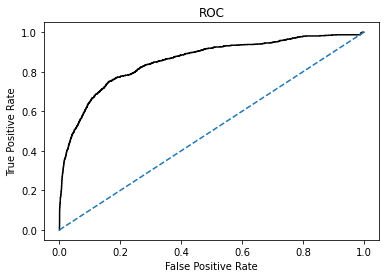

In [719]:
# # AUC and ROC for the training data


# # predict probabilities
log_train_fpr, log_train_tpr,_=roc_curve(y_train,log_model.predict_proba(X_train)[:,1])
plt.plot(log_train_fpr,log_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_train_auc=roc_auc_score(y_train,log_model.predict_proba(X_train)[:,1])
print('Area under Curve is', log_train_auc)


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.8567051531963814


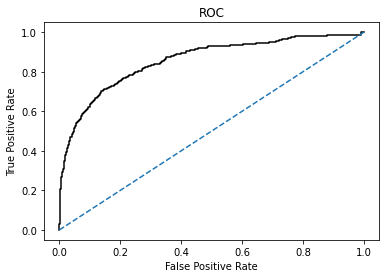

In [720]:

# # AUC and ROC for the test data

# # predict probabilities

log_test_fpr, log_test_tpr,_=roc_curve(y_test,log_model.predict_proba(X_test)[:,1])
plt.plot(log_test_fpr,log_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_test_auc=roc_auc_score(y_test,log_model.predict_proba(X_test)[:,1])
print('Area under Curve is', log_test_auc)


### Confusion Matrix for test data

### Applying GridSearchCV for Logistic Regression

In [507]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [508]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [509]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [510]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [511]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none')


In [512]:
best_model = grid_search.best_estimator_

In [513]:
# Prediction on the training set
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [514]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.565507,0.434493
1,0.462834,0.537166
2,0.912394,0.087606
3,0.754803,0.245197
4,0.977400,0.022600


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6556
           1       0.78      0.39      0.52      1326

    accuracy                           0.88      7882
   macro avg       0.83      0.68      0.72      7882
weighted avg       0.87      0.88      0.86      7882
 



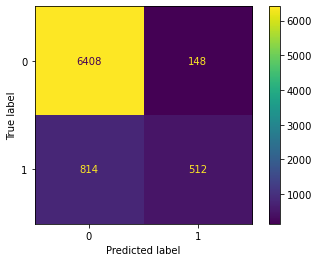

In [515]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2808
           1       0.77      0.41      0.53       570

    accuracy                           0.88      3378
   macro avg       0.83      0.69      0.73      3378
weighted avg       0.87      0.88      0.86      3378
 



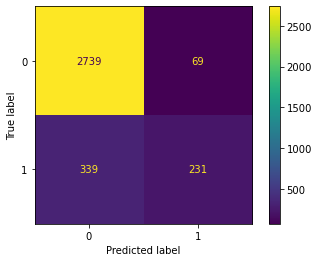

In [516]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [640]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [641]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [643]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=50)

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

array([[6556,    0],
       [   0, 1326]], dtype=int64)

<AxesSubplot:>

Text(0.5, 15.0, 'Predicted Label')

Text(33.0, 0.5, 'Actual Label')

Text(0.5, 1.0, 'Confusion Matrix')

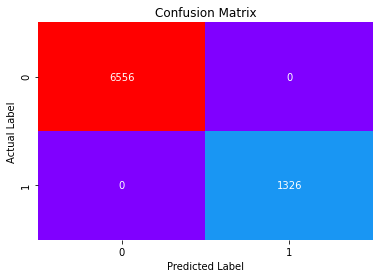

In [645]:
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [646]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



<Figure size 864x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

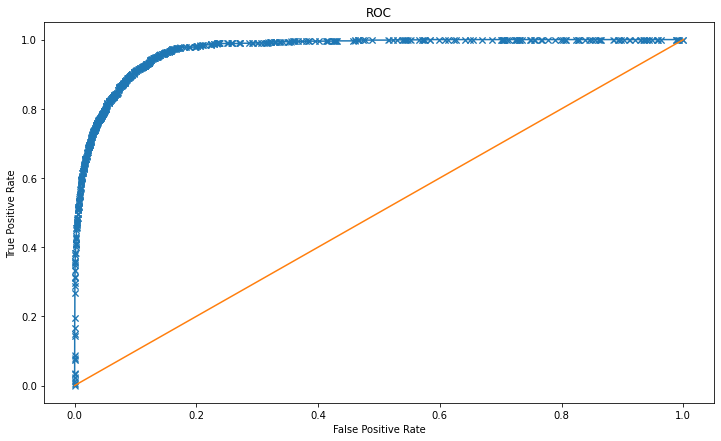

Area under Curve is 0.8218341896292942


In [647]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict(X_train)))

array([[2793,   15],
       [  86,  484]], dtype=int64)

<AxesSubplot:>

Text(0.5, 15.0, 'Predicted Label')

Text(33.0, 0.5, 'Actual Label')

Text(0.5, 1.0, 'Confusion Matrix')

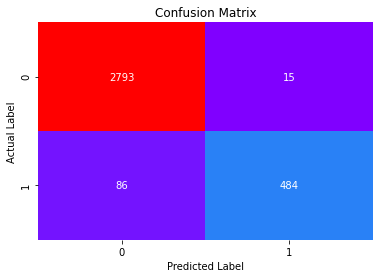

In [648]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,ytest_predict))

<Figure size 864x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

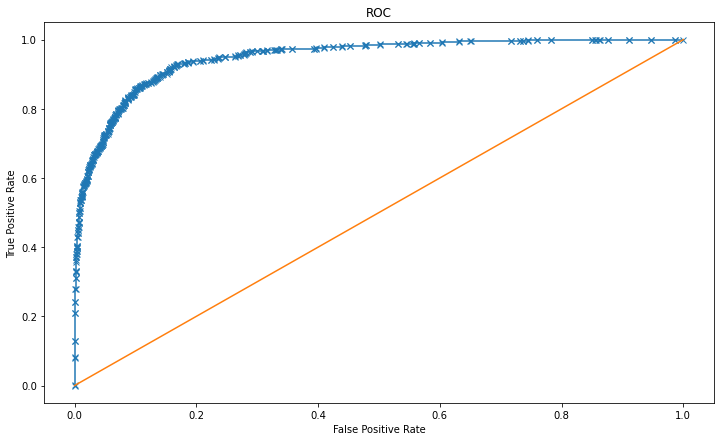

Area under Curve is 0.8003505023241866


In [649]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict(X_test)))

### LDA Model

In [738]:
#Build LDA Model
LDA = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)


In [739]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_LDA = LDA_model.predict(X_train)

In [741]:
# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_LDA = LDA_model.predict(X_test)

In [742]:
ytrain_predict_prob_LDA=LDA_model.predict_proba(X_train)
ytest_predict_prob_LDA=LDA_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_LDA).head()

,0,1
0,0.624017,0.375983
1,0.578343,0.421657
2,0.902246,0.097754
3,0.820038,0.179962
4,0.973269,0.026731


In [743]:
LDA_model_score_train=LDA_model.score(X_train,y_train)
print("Train Efficency:",LDA_model_score_train)
print(metrics.confusion_matrix(y_train,ytrain_predict_LDA))
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_LDA),'\n')
LDA_model_score_test=LDA_model.score(X_test,y_test)
print("Test Efficency:",LDA_model_score_test)
print(metrics.confusion_matrix(y_test,ytest_predict_LDA))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_LDA),'\n')

Train Efficency: 0.8657701091093631
[[6414  142]
 [ 916  410]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.98      0.92      6556
           1       0.74      0.31      0.44      1326

    accuracy                           0.87      7882
   macro avg       0.81      0.64      0.68      7882
weighted avg       0.85      0.87      0.84      7882
 

Test Efficency: 0.8673771462403789
[[2741   67]
 [ 381  189]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      0.98      0.92      2808
           1       0.74      0.33      0.46       570

    accuracy                           0.87      3378
   macro avg       0.81      0.65      0.69      3378
weighted avg       0.85      0.87      0.85      3378
 



In [744]:
LDA_metrics=classification_report(y_train, ytrain_predict_LDA,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][0],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_f1=round(df.loc["1"][2],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.74
LDA_train_recall  0.31
LDA_train_f1  0.44


In [745]:
LDA_train_acc=LDA_model.score(X_train,y_train) 
LDA_train_acc

0.8657701091093631

In [746]:
LDA_metrics=classification_report(y_test, ytest_predict_LDA,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][0],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_f1=round(df.loc["1"][2],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.74
LDA_test_recall  0.33
LDA_test_f1  0.46


In [747]:
LDA_test_acc=LDA_model.score(X_test,y_test)
LDA_test_acc

0.8673771462403789

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.8246327958132144


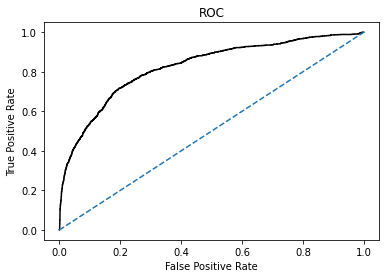

In [748]:
# # AUC and ROC for the training data


# # predict probabilities
LDA_train_fpr, LDA_train_tpr,_=roc_curve(y_train,LDA_model.predict_proba(X_train)[:,1])
plt.plot(LDA_train_fpr,LDA_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDA_train_auc=roc_auc_score(y_train,LDA_model.predict_proba(X_train)[:,1])
print('Area under Curve is', LDA_train_auc)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.8251624431448993


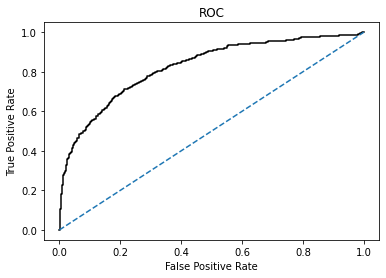

In [749]:
# # AUC and ROC for the test data

# # predict probabilities

LDA_test_fpr, LDA_test_tpr,_=roc_curve(y_test,LDA_model.predict_proba(X_test)[:,1])
plt.plot(LDA_test_fpr,LDA_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDA_test_auc=roc_auc_score(y_test,LDA_model.predict_proba(X_test)[:,1])
print('Area under Curve is', LDA_test_auc)

## KNN

In [663]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [664]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_KNN = KNN_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_KNN = KNN_model.predict(X_test)

In [665]:
ytrain_predict_prob_KNN=KNN_model.predict_proba(X_train)
ytest_predict_prob_KNN=KNN_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_KNN).head()

,0,1
0,0.8,0.2
1,0.8,0.2
2,0.8,0.2
3,0.8,0.2
4,1.0,0.0


In [672]:
KNN_model_score_train=KNN_model.score(X_train,y_train)
print("Train Efficency:",KNN_model_score_train)
print(metrics.confusion_matrix(y_train,ytrain_predict_KNN))
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_KNN),'\n')
KNN_model_score_test=KNN_model.score(X_test,y_test)
print("Test Efficency:",KNN_model_score_test)
print(metrics.confusion_matrix(y_test,ytest_predict_KNN))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_KNN),'\n')

Train Efficency: 0.9179142349657448
[[6398  158]
 [ 489  837]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.93      0.98      0.95      6556
           1       0.84      0.63      0.72      1326

    accuracy                           0.92      7882
   macro avg       0.89      0.80      0.84      7882
weighted avg       0.91      0.92      0.91      7882
 

Test Efficency: 0.8756660746003553
[[2696  112]
 [ 308  262]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2808
           1       0.70      0.46      0.56       570

    accuracy                           0.88      3378
   macro avg       0.80      0.71      0.74      3378
weighted avg       0.86      0.88      0.86      3378
 



In [674]:
knn_metrics=classification_report(y_train, ytrain_predict_KNN,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_train_precision=round(df.loc["1"][0],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_f1=round(df.loc["1"][2],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_precision  0.84
knn_train_recall  0.63
knn_train_f1  0.72


In [675]:
knn_train_acc=KNN_model.score(X_train,y_train) 
knn_train_acc

0.9179142349657448

In [676]:
knn_metrics=classification_report(y_test, ytest_predict_KNN,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.7
knn_test_recall  0.46
knn_test_f1  0.56


In [677]:
knn_test_acc=KNN_model.score(X_test,y_test)
knn_test_acc

0.8756660746003553

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.9627773529273727


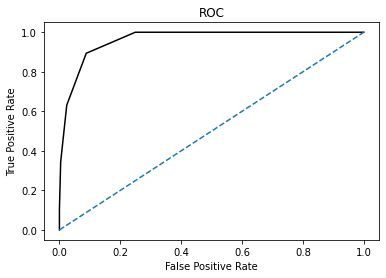

In [679]:
# # predict probabilities
knn_train_fpr, knn_train_tpr,_=roc_curve(y_train,KNN_model.predict_proba(X_train)[:,1])
plt.plot(knn_train_fpr,knn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_train_auc=roc_auc_score(y_train,KNN_model.predict_proba(X_train)[:,1])
print('Area under Curve is', knn_train_auc)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.8872057279952016


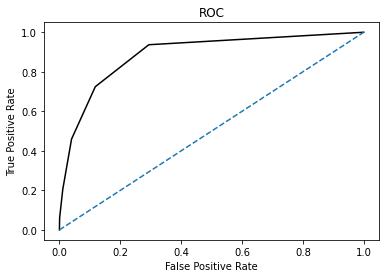

In [680]:
# # predict probabilities

knn_test_fpr, knn_test_tpr,_=roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.plot(knn_test_fpr,knn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_test_auc=roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1])
print('Area under Curve is', knn_test_auc)

## Naive Bayes

In [683]:
NB_model = GaussianNB()
# fit the model
NB_model.fit(X_train, y_train)

GaussianNB()

In [686]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_NB = NB_model.predict(X_train)

In [687]:

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_NB = NB_model.predict(X_test)

In [688]:
ytrain_predict_prob_NB=NB_model.predict_proba(X_train)
ytest_predict_prob_NB=NB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_NB).head()

,0,1
0,0.590542,0.409458
1,0.574675,0.425325
2,0.883726,0.116274
3,0.799354,0.200646
4,0.978703,0.021297


In [689]:
NB_model_score_train=NB_model.score(X_train,y_train)
print("Train Efficency:",NB_model_score_train)
print(metrics.confusion_matrix(y_train,ytrain_predict_NB))
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_NB),'\n')
NB_model_score_test=NB_model.score(X_test,y_test)
print("Test Efficency:",NB_model_score_test)
print(metrics.confusion_matrix(y_test,ytest_predict_NB))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_NB),'\n')


Train Efficency: 0.8614564831261101
[[6403  153]
 [ 939  387]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.98      0.92      6556
           1       0.72      0.29      0.41      1326

    accuracy                           0.86      7882
   macro avg       0.79      0.63      0.67      7882
weighted avg       0.85      0.86      0.84      7882
 

Test Efficency: 0.8632326820603907
[[2740   68]
 [ 394  176]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.98      0.92      2808
           1       0.72      0.31      0.43       570

    accuracy                           0.86      3378
   macro avg       0.80      0.64      0.68      3378
weighted avg       0.85      0.86      0.84      3378
 



In [690]:
NB_metrics=classification_report(y_train, ytrain_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_precision=round(df.loc["1"][0],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_f1=round(df.loc["1"][2],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.72
NB_train_recall  0.29
NB_train_f1  0.41


In [691]:
NB_train_acc=NB_model.score(X_train,y_train) 
NB_train_acc

0.8614564831261101

In [692]:
NB_metrics=classification_report(y_test, ytest_predict_NB,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_precision=round(df.loc["1"][0],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_f1=round(df.loc["1"][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.72
NB_test_recall  0.31
NB_test_f1  0.43


In [693]:
NB_test_acc=NB_model.score(X_test,y_test)
NB_test_acc

0.8632326820603907

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.8148541812181764


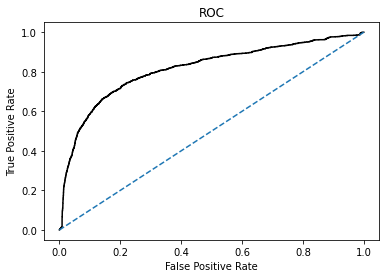

In [694]:
# # AUC and ROC for the training data


# # predict probabilities
NB_train_fpr, NB_train_tpr,_=roc_curve(y_train,NB_model.predict_proba(X_train)[:,1])
plt.plot(NB_train_fpr,NB_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_train_auc=roc_auc_score(y_train,NB_model.predict_proba(X_train)[:,1])
print('Area under Curve is', NB_train_auc)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.8076092117758785


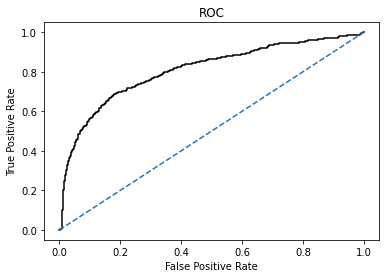

In [695]:
# # AUC and ROC for the test data

# # predict probabilities

NB_test_fpr, NB_test_tpr,_=roc_curve(y_test,NB_model.predict_proba(X_test)[:,1])
plt.plot(NB_test_fpr,NB_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_test_auc=roc_auc_score(y_test,NB_model.predict_proba(X_test)[:,1])
print('Area under Curve is', NB_test_auc)

### BAGGING

In [696]:

cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [697]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_Bagging = Bagging_model.predict(X_train)

In [698]:
# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_Bagging = Bagging_model.predict(X_test)

In [699]:
ytrain_predict_prob_Bagging=Bagging_model.predict_proba(X_train)
ytest_predict_prob_Bagging=Bagging_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_Bagging).head()

,0,1
0,0.55,0.45
1,0.05,0.95
2,0.94,0.06
3,0.92,0.08
4,1.00,0.00


In [700]:
Bagging_model_score_train=Bagging_model.score(X_train,y_train)
print("Train Efficency:",Bagging_model_score_train)
print(metrics.confusion_matrix(y_train,ytrain_predict_Bagging))
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_Bagging),'\n')
Bagging_model_score_test=Bagging_model.score(X_test,y_test)
print("Test Efficency:",Bagging_model_score_test)
print(metrics.confusion_matrix(y_test,ytest_predict_Bagging))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_Bagging),'\n')

Train Efficency: 1.0
[[6556    0]
 [   0 1326]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 

Test Efficency: 0.9674363528715216
[[2789   19]
 [  91  479]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2808
           1       0.96      0.84      0.90       570

    accuracy                           0.97      3378
   macro avg       0.97      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378
 



In [701]:
Bagging_metrics=classification_report(y_train, ytrain_predict_Bagging,output_dict=True)
df=pd.DataFrame(Bagging_metrics).transpose()
Bagging_train_precision=round(df.loc["1"][0],2)
Bagging_train_recall=round(df.loc["1"][1],2)
Bagging_train_f1=round(df.loc["1"][2],2)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)


Bagging_train_precision  1.0
Bagging_train_recall  1.0
Bagging_train_f1  1.0


In [702]:
Bagging_train_acc=Bagging_model.score(X_train,y_train) 
Bagging_train_acc

1.0

In [703]:
Bagging_metrics=classification_report(y_test, ytest_predict_Bagging,output_dict=True)
df=pd.DataFrame(Bagging_metrics).transpose()
Bagging_test_precision=round(df.loc["1"][0],2)
Bagging_test_recall=round(df.loc["1"][1],2)
Bagging_test_f1=round(df.loc["1"][2],2)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_precision  0.96
Bagging_test_recall  0.84
Bagging_test_f1  0.9


In [704]:
Bagging_test_acc=Bagging_model.score(X_test,y_test)
Bagging_test_acc

0.9674363528715216

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 1.0


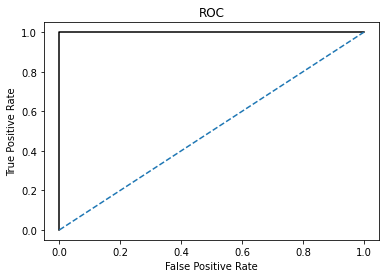

In [705]:
# # AUC and ROC for the training data


# # predict probabilities
Bagging_train_fpr, Bagging_train_tpr,_=roc_curve(y_train,Bagging_model.predict_proba(X_train)[:,1])
plt.plot(Bagging_train_fpr,Bagging_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
Bagging_train_auc=roc_auc_score(y_train,Bagging_model.predict_proba(X_train)[:,1])
print('Area under Curve is', Bagging_train_auc)


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.9859758459539161


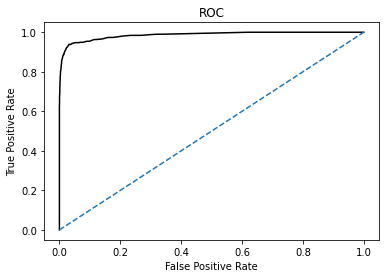

In [706]:
# # AUC and ROC for the test data

# # predict probabilities

Bagging_test_fpr, Bagging_test_tpr,_=roc_curve(y_test,Bagging_model.predict_proba(X_test)[:,1])
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
Bagging_test_auc=roc_auc_score(y_test,Bagging_model.predict_proba(X_test)[:,1])
print('Area under Curve is', Bagging_test_auc)

In [753]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dataA = pd.DataFrame(
    {
       'CART Train':[Bagging_train_acc,Bagging_train_auc,Bagging_train_recall,Bagging_train_precision,Bagging_train_f1],
       'CART Test':[Bagging_test_acc,Bagging_test_auc,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1],
       'Logistic Regr. Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
       'Logistic Regr. Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
       'Naive Bayes Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
       'Naive Bayes Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
       'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
       'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
       'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1]
                     },index=index)

round(dataA,2)

,CART Train,CART Test,Logistic Regr. Train,Logistic Regr. Test,Naive Bayes Train,Naive Bayes Test,LDA Train,LDA Test,KNN Train,KNN Test
Accuracy,1.0,0.97,0.88,0.88,0.86,0.86,0.87,0.87,0.92,0.88
AUC,1.0,0.99,0.86,0.86,0.81,0.81,0.82,0.83,0.96,0.89
Recall,1.0,0.84,0.39,0.41,0.29,0.31,0.31,0.33,0.63,0.46
Precision,1.0,0.96,0.78,0.77,0.72,0.72,0.74,0.74,0.84,0.70
F1 Score,1.0,0.90,0.52,0.53,0.41,0.43,0.44,0.46,0.72,0.56


## Application of SMOTE

In [754]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [755]:
## Let's check the shape after SMOTE
X_train_res.shape, X_train.shape

((13112, 18), (7882, 18))

In [756]:
pd.Series(y_train_res).value_counts(normalize=True)

1    0.5
0    0.5
dtype: float64

### Logistic regression with SMOTE

In [757]:
log_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
log_model.fit(X_train_res, y_train_res)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [759]:
log_SMOTE_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
log_SMOTE_model.fit(X_train_res, y_train_res)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [760]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_log_SMOTE = log_SMOTE_model.predict(X_train_res)
### Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_log_SMOTE = log_SMOTE_model.predict(X_test)
ytrain_predict_prob_log_SMOTE=log_SMOTE_model.predict_proba(X_train_res)
ytest_predict_prob_log_SMOTE=log_SMOTE_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log_SMOTE).head()
log_SMOTE_model_score_train=log_SMOTE_model.score(X_train_res,y_train_res)
print("Train Efficency:",log_SMOTE_model_score_train)
print(metrics.confusion_matrix(y_train_res,ytrain_predict_log_SMOTE))
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,ytrain_predict_log_SMOTE),'\n')
log_SMOTE_model_score_test=log_SMOTE_model.score(X_test,y_test)
print("Test Efficency:",log_SMOTE_model_score_test)
print(metrics.confusion_matrix(y_test,ytest_predict_log_SMOTE))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_log_SMOTE),'\n')

,0,1
0,0.461551,0.538449
1,0.133098,0.866902
2,0.453393,0.546607
3,0.398027,0.601973
4,0.929197,0.070803


Train Efficency: 0.7830994508846858
[[4931 1625]
 [1219 5337]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.75      0.78      6556
           1       0.77      0.81      0.79      6556

    accuracy                           0.78     13112
   macro avg       0.78      0.78      0.78     13112
weighted avg       0.78      0.78      0.78     13112
 

Test Efficency: 0.7439313203078745
[[2074  734]
 [ 131  439]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.94      0.74      0.83      2808
           1       0.37      0.77      0.50       570

    accuracy                           0.74      3378
   macro avg       0.66      0.75      0.67      3378
weighted avg       0.85      0.74      0.77      3378
 



In [761]:
log_SMOTE_metrics=classification_report(y_train_res, ytrain_predict_log_SMOTE,output_dict=True)
df=pd.DataFrame(log_SMOTE_metrics).transpose()
log_SMOTE_train_precision=round(df.loc["1"][0],2)
log_SMOTE_train_recall=round(df.loc["1"][1],2)
log_SMOTE_train_f1=round(df.loc["1"][2],2)
print ('log_SMOTE_train_precision ',log_SMOTE_train_precision)
print ('log_SMOTE_train_recall ',log_SMOTE_train_recall)
print ('log_SMOTE_train_f1 ',log_SMOTE_train_f1)
log_SMOTE_train_acc=log_SMOTE_model.score(X_train_res,y_train_res) 
log_SMOTE_train_acc

log_SMOTE_train_precision  0.77
log_SMOTE_train_recall  0.81
log_SMOTE_train_f1  0.79


0.7830994508846858

In [762]:
log_SMOTE_metrics=classification_report(y_test, ytest_predict_log_SMOTE,output_dict=True)
df=pd.DataFrame(log_SMOTE_metrics).transpose()
log_SMOTE_test_precision=round(df.loc["1"][0],2)
log_SMOTE_test_recall=round(df.loc["1"][1],2)
log_SMOTE_test_f1=round(df.loc["1"][2],2)
print ('log_SMOTE_test_precision ',log_SMOTE_test_precision)
print ('log_SMOTE_test_recall ',log_SMOTE_test_recall)
print ('log_SMOTE_test_f1 ',log_SMOTE_test_f1)

log_SMOTE_test_precision  0.37
log_SMOTE_test_recall  0.77
log_SMOTE_test_f1  0.5


In [763]:
log_SMOTE_test_acc=log_SMOTE_model.score(X_test,y_test)
log_SMOTE_test_acc

0.7439313203078745

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.8497828675351903


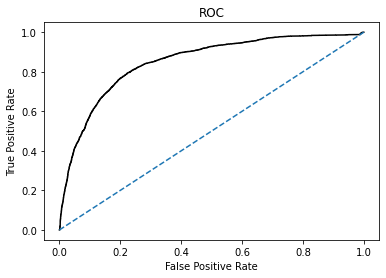

In [764]:
# # AUC and ROC for the training data


# # predict probabilities
log_SMOTE_train_fpr, log_SMOTE_train_tpr,_=roc_curve(y_train_res,log_SMOTE_model.predict_proba(X_train_res)[:,1])
plt.plot(log_SMOTE_train_fpr,log_SMOTE_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_SMOTE_train_auc=roc_auc_score(y_train_res,log_SMOTE_model.predict_proba(X_train_res)[:,1])
print('Area under Curve is', log_SMOTE_train_auc)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.8280976658169641


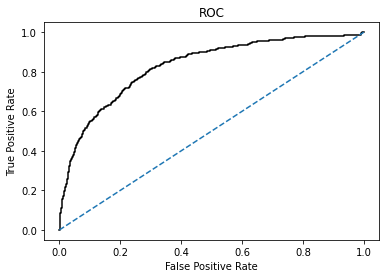

In [765]:
# # AUC and ROC for the test data

# # predict probabilities

log_SMOTE_test_fpr, log_SMOTE_test_tpr,_=roc_curve(y_test,log_SMOTE_model.predict_proba(X_test)[:,1])
plt.plot(log_SMOTE_test_fpr,log_SMOTE_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_SMOTE_test_auc=roc_auc_score(y_test,log_SMOTE_model.predict_proba(X_test)[:,1])
print('Area under Curve is', log_SMOTE_test_auc)

In [767]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dataA = pd.DataFrame(
    {
       'Logistic Regr. Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
       'Logistic Regr. Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
       'Logistic Regr. Train-SMOTE':[log_SMOTE_train_acc,log_SMOTE_train_auc,log_SMOTE_train_recall,log_SMOTE_train_precision,log_SMOTE_train_f1],
       'Logistic Regr. Test-SMOTE':[log_SMOTE_test_acc,log_SMOTE_test_auc,log_SMOTE_test_recall,log_SMOTE_test_precision,log_SMOTE_test_f1],
                     },index=index)

round(dataA,2)

,Logistic Regr. Train,Logistic Regr. Test,Logistic Regr. Train-SMOTE,Logistic Regr. Test-SMOTE
Accuracy,0.88,0.88,0.78,0.74
AUC,0.86,0.86,0.85,0.83
Recall,0.39,0.41,0.81,0.77
Precision,0.78,0.77,0.77,0.37
F1 Score,0.52,0.53,0.79,0.50


### Bagging with SMOTE

In [770]:
cart = DecisionTreeClassifier()
Bag_SMOTE_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bag_SMOTE_model.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [771]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_Bag_SMOTE = Bag_SMOTE_model.predict(X_train_res)

In [772]:
# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_Bag_SMOTE = Bag_SMOTE_model.predict(X_test)

In [773]:
ytrain_predict_prob_Bag_SMOTE=Bag_SMOTE_model.predict_proba(X_train_res)
ytest_predict_prob_Bag_SMOTE=Bag_SMOTE_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_Bag_SMOTE).head()

,0,1
0,0.26,0.74
1,0.09,0.91
2,1.00,0.00
3,0.62,0.38
4,1.00,0.00


In [774]:
Bag_SMOTE_model_score_train=Bag_SMOTE_model.score(X_train_res,y_train_res)
print("Train Efficency:",Bag_SMOTE_model_score_train)
print(metrics.confusion_matrix(y_train_res,ytrain_predict_Bag_SMOTE))
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,ytrain_predict_Bag_SMOTE),'\n')
Bag_SMOTE_model_score_test=Bag_SMOTE_model.score(X_test,y_test)
print("Test Efficency:",Bag_SMOTE_model_score_test)
print(metrics.confusion_matrix(y_test,ytest_predict_Bag_SMOTE))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_Bag_SMOTE),'\n')

Train Efficency: 1.0
[[6556    0]
 [   0 6556]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112
 

Test Efficency: 0.9594434576672587
[[2732   76]
 [  61  509]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2808
           1       0.87      0.89      0.88       570

    accuracy                           0.96      3378
   macro avg       0.92      0.93      0.93      3378
weighted avg       0.96      0.96      0.96      3378
 



In [775]:
Bag_SMOTE_metrics=classification_report(y_train_res, ytrain_predict_Bag_SMOTE,output_dict=True)
df=pd.DataFrame(Bag_SMOTE_metrics).transpose()
Bag_SMOTE_train_precision=round(df.loc["1"][0],2)
Bag_SMOTE_train_recall=round(df.loc["1"][1],2)
Bag_SMOTE_train_f1=round(df.loc["1"][2],2)
print ('Bag_SMOTE_train_precision ',Bag_SMOTE_train_precision)
print ('Bag_SMOTE_train_recall ',Bag_SMOTE_train_recall)
print ('Bag_SMOTE_train_f1 ',Bag_SMOTE_train_f1)


Bag_SMOTE_train_precision  1.0
Bag_SMOTE_train_recall  1.0
Bag_SMOTE_train_f1  1.0


In [776]:
Bag_SMOTE_train_acc=Bag_SMOTE_model.score(X_train_res,y_train_res) 
Bag_SMOTE_train_acc

1.0

In [777]:
Bag_SMOTE_metrics=classification_report(y_test, ytest_predict_Bag_SMOTE,output_dict=True)
df=pd.DataFrame(Bag_SMOTE_metrics).transpose()
Bag_SMOTE_test_precision=round(df.loc["1"][0],2)
Bag_SMOTE_test_recall=round(df.loc["1"][1],2)
Bag_SMOTE_test_f1=round(df.loc["1"][2],2)
print ('Bag_SMOTE_test_precision ',Bag_SMOTE_test_precision)
print ('Bag_SMOTE_test_recall ',Bag_SMOTE_test_recall)
print ('Bag_SMOTE_test_f1 ',Bag_SMOTE_test_f1)

Bag_SMOTE_test_precision  0.87
Bag_SMOTE_test_recall  0.89
Bag_SMOTE_test_f1  0.88


In [778]:
Bag_SMOTE_test_acc=Bag_SMOTE_model.score(X_test,y_test)
Bag_SMOTE_test_acc

0.9594434576672587

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 1.0


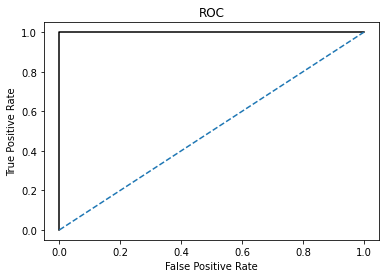

In [779]:
# # AUC and ROC for the training data


# # predict probabilities
Bag_SMOTE_train_fpr, Bag_SMOTE_train_tpr,_=roc_curve(y_train_res,Bag_SMOTE_model.predict_proba(X_train_res)[:,1])
plt.plot(Bag_SMOTE_train_fpr,Bag_SMOTE_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
Bag_SMOTE_train_auc=roc_auc_score(y_train_res,Bag_SMOTE_model.predict_proba(X_train_res)[:,1])
print('Area under Curve is', Bag_SMOTE_train_auc)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.9822171614934772


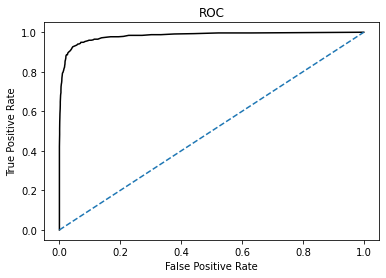

In [780]:
# # AUC and ROC for the test data

# # predict probabilities

Bag_SMOTE_test_fpr, Bag_SMOTE_test_tpr,_=roc_curve(y_test,Bag_SMOTE_model.predict_proba(X_test)[:,1])
plt.plot(Bag_SMOTE_test_fpr,Bag_SMOTE_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
Bag_SMOTE_test_auc=roc_auc_score(y_test,Bag_SMOTE_model.predict_proba(X_test)[:,1])
print('Area under Curve is', Bag_SMOTE_test_auc)

### Naiive Bayes with SMOTE

In [782]:
NB_SMOTE_model = GaussianNB()
# fit the model
NB_SMOTE_model.fit(X_train_res, y_train_res)

GaussianNB()

In [783]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_NB_SMOTE = NB_SMOTE_model.predict(X_train_res)

In [784]:
# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_NB_SMOTE = NB_SMOTE_model.predict(X_test)

In [785]:
ytrain_predict_prob_NB_SMOTE=NB_SMOTE_model.predict_proba(X_train_res)
ytest_predict_prob_NB_SMOTE=NB_SMOTE_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_NB_SMOTE).head()

,0,1
0,0.533537,0.466463
1,0.162472,0.837528
2,0.467778,0.532222
3,0.306361,0.693639
4,0.943602,0.056398


In [786]:
NB_SMOTE_model_score_train=NB_SMOTE_model.score(X_train_res,y_train_res)
print("Train Efficency:",NB_SMOTE_model_score_train)
print(metrics.confusion_matrix(y_train_res,ytrain_predict_NB_SMOTE))
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,ytrain_predict_NB_SMOTE),'\n')
NB_SMOTE_model_score_test=NB_SMOTE_model.score(X_test,y_test)
print("Test Efficency:",NB_SMOTE_model_score_test)
print(metrics.confusion_matrix(y_test,ytest_predict_NB_SMOTE))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_NB_SMOTE),'\n')

Train Efficency: 0.7469493593654668
[[4648 1908]
 [1410 5146]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.71      0.74      6556
           1       0.73      0.78      0.76      6556

    accuracy                           0.75     13112
   macro avg       0.75      0.75      0.75     13112
weighted avg       0.75      0.75      0.75     13112
 

Test Efficency: 0.7078152753108348
[[1981  827]
 [ 160  410]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.93      0.71      0.80      2808
           1       0.33      0.72      0.45       570

    accuracy                           0.71      3378
   macro avg       0.63      0.71      0.63      3378
weighted avg       0.83      0.71      0.74      3378
 



In [787]:
NB_SMOTE_metrics=classification_report(y_train_res, ytrain_predict_NB_SMOTE,output_dict=True)
df=pd.DataFrame(NB_SMOTE_metrics).transpose()
NB_SMOTE_train_precision=round(df.loc["1"][0],2)
NB_SMOTE_train_recall=round(df.loc["1"][1],2)
NB_SMOTE_train_f1=round(df.loc["1"][2],2)
print ('NB_SMOTE_train_precision ',NB_SMOTE_train_precision)
print ('NB_SMOTE_train_recall ',NB_SMOTE_train_recall)
print ('NB_SMOTE_train_f1 ',NB_SMOTE_train_f1)

NB_SMOTE_train_precision  0.73
NB_SMOTE_train_recall  0.78
NB_SMOTE_train_f1  0.76


In [788]:

NB_SMOTE_train_acc=NB_SMOTE_model.score(X_train_res,y_train_res) 
NB_SMOTE_train_acc

0.7469493593654668

In [789]:
NB_SMOTE_metrics=classification_report(y_test, ytest_predict_NB_SMOTE,output_dict=True)
df=pd.DataFrame(NB_SMOTE_metrics).transpose()
NB_SMOTE_test_precision=round(df.loc["1"][0],2)
NB_SMOTE_test_recall=round(df.loc["1"][1],2)
NB_SMOTE_test_f1=round(df.loc["1"][2],2)
print ('NB_SMOTE_test_precision ',NB_SMOTE_test_precision)
print ('NB_SMOTE_test_recall ',NB_SMOTE_test_recall)
print ('NB_SMOTE_test_f1 ',NB_SMOTE_test_f1)

NB_SMOTE_test_precision  0.33
NB_SMOTE_test_recall  0.72
NB_SMOTE_test_f1  0.45


In [790]:
NB_SMOTE_test_acc=NB_SMOTE_model.score(X_test,y_test)
NB_SMOTE_test_acc

0.7078152753108348

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.809158883096994


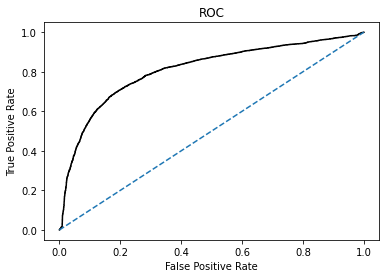

In [791]:
# # AUC and ROC for the training data


# # predict probabilities
NB_SMOTE_train_fpr, NB_SMOTE_train_tpr,_=roc_curve(y_train_res,NB_SMOTE_model.predict_proba(X_train_res)[:,1])
plt.plot(NB_SMOTE_train_fpr,NB_SMOTE_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_SMOTE_train_auc=roc_auc_score(y_train_res,NB_SMOTE_model.predict_proba(X_train_res)[:,1])
print('Area under Curve is', NB_SMOTE_train_auc)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.7697405907932224


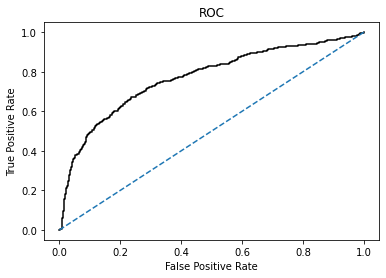

In [792]:
# # AUC and ROC for the test data

# # predict probabilities

NB_SMOTE_test_fpr, NB_SMOTE_test_tpr,_=roc_curve(y_test,NB_SMOTE_model.predict_proba(X_test)[:,1])
plt.plot(NB_SMOTE_test_fpr,NB_SMOTE_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_SMOTE_test_auc=roc_auc_score(y_test,NB_SMOTE_model.predict_proba(X_test)[:,1])
print('Area under Curve is', NB_SMOTE_test_auc)

### KNN with SMOTE

In [804]:
KNN_SMOTE_model=KNeighborsClassifier(n_neighbors=5)
KNN_SMOTE_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [805]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_KNN_SMOTE = KNN_SMOTE_model.predict(X_train_res)

In [806]:
# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_KNN_SMOTE = KNN_SMOTE_model.predict(X_test)

In [807]:
ytrain_predict_prob_KNN_SMOTE=KNN_SMOTE_model.predict_proba(X_train_res)
ytest_predict_prob_KNN_SMOTE=KNN_SMOTE_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_KNN_SMOTE).head()


,0,1
0,0.0,1.0
1,0.8,0.2
2,0.8,0.2
3,0.4,0.6
4,1.0,0.0


In [808]:
KNN_SMOTE_model_score_train=KNN_SMOTE_model.score(X_train_res,y_train_res)
print("Train Efficency:",KNN_SMOTE_model_score_train)
print(metrics.confusion_matrix(y_train_res,ytrain_predict_KNN_SMOTE))
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,ytrain_predict_KNN_SMOTE),'\n')
KNN_SMOTE_model_score_test=KNN_SMOTE_model.score(X_test,y_test)
print("Test Efficency:",KNN_SMOTE_model_score_test)
print(metrics.confusion_matrix(y_test,ytest_predict_KNN_SMOTE))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_KNN_SMOTE),'\n')

Train Efficency: 0.9325045759609518
[[5698  858]
 [  27 6529]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      0.87      0.93      6556
           1       0.88      1.00      0.94      6556

    accuracy                           0.93     13112
   macro avg       0.94      0.93      0.93     13112
weighted avg       0.94      0.93      0.93     13112
 

Test Efficency: 0.8211959739490823
[[2277  531]
 [  73  497]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.81      0.88      2808
           1       0.48      0.87      0.62       570

    accuracy                           0.82      3378
   macro avg       0.73      0.84      0.75      3378
weighted avg       0.89      0.82      0.84      3378
 



In [809]:
KNN_SMOTE_metrics=classification_report(y_train_res, ytrain_predict_KNN_SMOTE,output_dict=True)
df=pd.DataFrame(KNN_SMOTE_metrics).transpose()
KNN_SMOTE_train_precision=round(df.loc["1"][0],2)
KNN_SMOTE_train_recall=round(df.loc["1"][1],2)
KNN_SMOTE_train_f1=round(df.loc["1"][2],2)
print ('KNN_SMOTE_train_precision ',KNN_SMOTE_train_precision)
print ('KNN_SMOTE_train_recall ',KNN_SMOTE_train_recall)
print ('KNN_SMOTE_train_f1 ',KNN_SMOTE_train_f1)

KNN_SMOTE_train_precision  0.88
KNN_SMOTE_train_recall  1.0
KNN_SMOTE_train_f1  0.94


In [810]:
KNN_SMOTE_train_acc=KNN_SMOTE_model.score(X_train_res,y_train_res) 
KNN_SMOTE_train_acc

0.9325045759609518

In [811]:
KNN_SMOTE_metrics=classification_report(y_test, ytest_predict_KNN_SMOTE,output_dict=True)
df=pd.DataFrame(KNN_SMOTE_metrics).transpose()
KNN_SMOTE_test_precision=round(df.loc["1"][0],2)
KNN_SMOTE_test_recall=round(df.loc["1"][1],2)
KNN_SMOTE_test_f1=round(df.loc["1"][2],2)
print ('KNN_SMOTE_test_precision ',KNN_SMOTE_test_precision)
print ('KNN_SMOTE_test_recall ',KNN_SMOTE_test_recall)
print ('KNN_SMOTE_test_f1 ',KNN_SMOTE_test_f1)

KNN_SMOTE_test_precision  0.48
KNN_SMOTE_test_recall  0.87
KNN_SMOTE_test_f1  0.62


In [812]:
KNN_SMOTE_test_acc=KNN_SMOTE_model.score(X_test,y_test)
KNN_SMOTE_test_acc

0.8211959739490823

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.9971920821264473


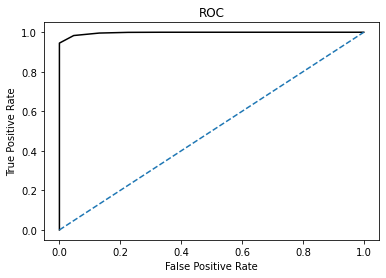

In [813]:
# # AUC and ROC for the training data


# # predict probabilities
KNN_SMOTE_train_fpr, KNN_SMOTE_train_tpr,_=roc_curve(y_train_res,KNN_SMOTE_model.predict_proba(X_train_res)[:,1])
plt.plot(KNN_SMOTE_train_fpr,KNN_SMOTE_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_SMOTE_train_auc=roc_auc_score(y_train_res,KNN_SMOTE_model.predict_proba(X_train_res)[:,1])
print('Area under Curve is', KNN_SMOTE_train_auc)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.9081446493727197


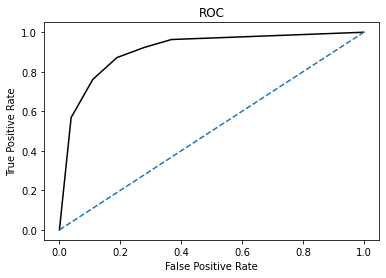

In [814]:
# # AUC and ROC for the test data

# # predict probabilities

KNN_SMOTE_test_fpr, KNN_SMOTE_test_tpr,_=roc_curve(y_test,KNN_SMOTE_model.predict_proba(X_test)[:,1])
plt.plot(KNN_SMOTE_test_fpr,KNN_SMOTE_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_SMOTE_test_auc=roc_auc_score(y_test,KNN_SMOTE_model.predict_proba(X_test)[:,1])
print('Area under Curve is', KNN_SMOTE_test_auc)

### LDA with SMOTE

In [819]:
#Build LDA Model
LDA = LinearDiscriminantAnalysis()
LDA_SMOTE_model=clf.fit(X_train_res,y_train_res)

In [821]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_LDA_SMOTE = LDA_SMOTE_model.predict(X_train_res)

In [822]:

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_LDA_SMOTE = LDA_SMOTE_model.predict(X_test)

In [823]:
ytrain_predict_prob_LDA_SMOTE=LDA_SMOTE_model.predict_proba(X_train_res)
ytest_predict_prob_LDA_SMOTE=LDA_SMOTE_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_LDA_SMOTE).head()

,0,1
0,0.476839,0.523161
1,0.140754,0.859246
2,0.407256,0.592744
3,0.423983,0.576017
4,0.922046,0.077954


In [824]:
LDA_SMOTE_model_score_train=LDA_SMOTE_model.score(X_train_res,y_train_res)
print("Train Efficency:",LDA_SMOTE_model_score_train)
print(metrics.confusion_matrix(y_train_res,ytrain_predict_LDA_SMOTE))
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,ytrain_predict_LDA_SMOTE),'\n')
LDA_SMOTE_model_score_test=LDA_SMOTE_model.score(X_test,y_test)
print("Test Efficency:",LDA_SMOTE_model_score_test)
print(metrics.confusion_matrix(y_test,ytest_predict_LDA_SMOTE))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_LDA_SMOTE),'\n')


Train Efficency: 0.7600671140939598
[[4714 1842]
 [1304 5252]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.78      0.72      0.75      6556
           1       0.74      0.80      0.77      6556

    accuracy                           0.76     13112
   macro avg       0.76      0.76      0.76     13112
weighted avg       0.76      0.76      0.76     13112
 

Test Efficency: 0.7214328004736531
[[1999  809]
 [ 132  438]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.94      0.71      0.81      2808
           1       0.35      0.77      0.48       570

    accuracy                           0.72      3378
   macro avg       0.64      0.74      0.65      3378
weighted avg       0.84      0.72      0.75      3378
 



In [825]:
LDA_SMOTE_metrics=classification_report(y_train_res, ytrain_predict_LDA_SMOTE,output_dict=True)
df=pd.DataFrame(LDA_SMOTE_metrics).transpose()
LDA_SMOTE_train_precision=round(df.loc["1"][0],2)
LDA_SMOTE_train_recall=round(df.loc["1"][1],2)
LDA_SMOTE_train_f1=round(df.loc["1"][2],2)
print ('LDA_SMOTE_train_precision ',LDA_SMOTE_train_precision)
print ('LDA_SMOTE_train_recall ',LDA_SMOTE_train_recall)
print ('LDA_SMOTE_train_f1 ',LDA_SMOTE_train_f1)

LDA_SMOTE_train_precision  0.74
LDA_SMOTE_train_recall  0.8
LDA_SMOTE_train_f1  0.77


In [826]:
LDA_SMOTE_train_acc=LDA_SMOTE_model.score(X_train_res,y_train_res) 
LDA_SMOTE_train_acc

0.7600671140939598

In [827]:
LDA_SMOTE_metrics=classification_report(y_test, ytest_predict_LDA_SMOTE,output_dict=True)
df=pd.DataFrame(LDA_SMOTE_metrics).transpose()
LDA_SMOTE_test_precision=round(df.loc["1"][0],2)
LDA_SMOTE_test_recall=round(df.loc["1"][1],2)
LDA_SMOTE_test_f1=round(df.loc["1"][2],2)
print ('LDA_SMOTE_test_precision ',LDA_SMOTE_test_precision)
print ('LDA_SMOTE_test_recall ',LDA_SMOTE_test_recall)
print ('LDA_SMOTE_test_f1 ',LDA_SMOTE_test_f1)

LDA_SMOTE_test_precision  0.35
LDA_SMOTE_test_recall  0.77
LDA_SMOTE_test_f1  0.48


In [828]:

LDA_SMOTE_test_acc=LDA_SMOTE_model.score(X_test,y_test)
LDA_SMOTE_test_acc

0.7214328004736531

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.8302860119844202


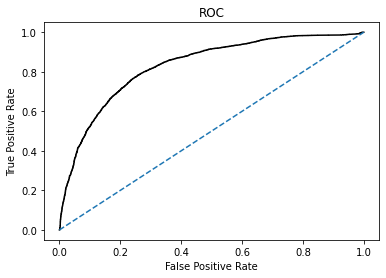

In [829]:
# # AUC and ROC for the training data


# # predict probabilities
LDA_SMOTE_train_fpr, LDA_SMOTE_train_tpr,_=roc_curve(y_train_res,LDA_SMOTE_model.predict_proba(X_train_res)[:,1])
plt.plot(LDA_SMOTE_train_fpr,LDA_SMOTE_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDA_SMOTE_train_auc=roc_auc_score(y_train_res,LDA_SMOTE_model.predict_proba(X_train_res)[:,1])
print('Area under Curve is', LDA_SMOTE_train_auc)


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

Area under Curve is 0.8092705053231368


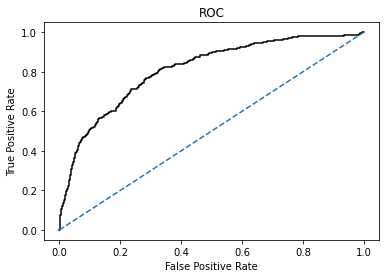

In [830]:
# # AUC and ROC for the test data

# # predict probabilities

LDA_SMOTE_test_fpr, LDA_SMOTE_test_tpr,_=roc_curve(y_test,LDA_SMOTE_model.predict_proba(X_test)[:,1])
LDA_SMOTE_test_fpr, LDA_SMOTE_test_tpr,_=roc_curve(y_test,LDA_SMOTE_model.predict_proba(X_test)[:,1])
plt.plot(LDA_SMOTE_test_fpr,LDA_SMOTE_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
LDA_SMOTE_test_auc=roc_auc_score(y_test,LDA_SMOTE_model.predict_proba(X_test)[:,1])
print('Area under Curve is', LDA_SMOTE_test_auc)

### PRE SMOTE:

In [834]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dataA = pd.DataFrame(
    {
       'CART Train':[Bagging_train_acc,Bagging_train_auc,Bagging_train_recall,Bagging_train_precision,Bagging_train_f1],
       'CART Test':[Bagging_test_acc,Bagging_test_auc,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1],
       'Logistic Regr. Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
       'Logistic Regr. Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
       'Naive Bayes Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
       'Naive Bayes Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
       'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
       'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
       'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1]
                     },index=index)

round(dataA,2)

,CART Train,CART Test,Logistic Regr. Train,Logistic Regr. Test,Naive Bayes Train,Naive Bayes Test,LDA Train,LDA Test,KNN Train,KNN Test
Accuracy,1.0,0.97,0.88,0.88,0.86,0.86,0.87,0.87,0.92,0.88
AUC,1.0,0.99,0.86,0.86,0.81,0.81,0.82,0.83,0.96,0.89
Recall,1.0,0.84,0.39,0.41,0.29,0.31,0.31,0.33,0.63,0.46
Precision,1.0,0.96,0.78,0.77,0.72,0.72,0.74,0.74,0.84,0.70
F1 Score,1.0,0.90,0.52,0.53,0.41,0.43,0.44,0.46,0.72,0.56


### POST SMOTE:

In [880]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dataA = pd.DataFrame(
    {'CART Train-SMOTE':[Bag_SMOTE_train_acc,Bag_SMOTE_train_auc,Bag_SMOTE_train_recall,Bag_SMOTE_train_precision,Bag_SMOTE_train_f1],
       'CART Test-SMOTE':[Bag_SMOTE_test_acc,Bag_SMOTE_test_auc,Bag_SMOTE_test_recall,Bag_SMOTE_test_precision,Bag_SMOTE_test_f1],
       'Logistic Regr. Train-SMOTE':[log_SMOTE_train_acc,log_SMOTE_train_auc,log_SMOTE_train_recall,log_SMOTE_train_precision,log_SMOTE_train_f1],
       'Logistic Regr. Test-SMOTE':[log_SMOTE_test_acc,log_SMOTE_test_auc,log_SMOTE_test_recall,log_SMOTE_test_precision,log_SMOTE_test_f1],
       'Naive Bayes Train-SMOTE':[NB_SMOTE_train_acc,NB_SMOTE_train_auc,NB_SMOTE_train_recall,NB_SMOTE_train_precision,NB_SMOTE_train_f1],
       'Naive Bayes Test-SMOTE':[NB_SMOTE_test_acc,NB_SMOTE_test_auc,NB_SMOTE_test_recall,NB_SMOTE_test_precision,NB_SMOTE_test_f1],
       'LDA Train-SMOTE':[LDA_SMOTE_train_acc,LDA_SMOTE_train_auc,LDA_SMOTE_train_recall,LDA_SMOTE_train_precision,LDA_SMOTE_train_f1],
       'LDA Test-SMOTE':[LDA_SMOTE_test_acc,LDA_SMOTE_test_auc,LDA_SMOTE_test_recall,LDA_SMOTE_test_precision,LDA_SMOTE_test_f1],
       'KNN Train-SMOTE':[KNN_SMOTE_train_acc,KNN_SMOTE_train_auc,KNN_SMOTE_train_recall,KNN_SMOTE_train_precision,KNN_SMOTE_train_f1],
       'KNN Test-SMOTE':[KNN_SMOTE_test_acc,KNN_SMOTE_test_auc,KNN_SMOTE_test_recall,KNN_SMOTE_test_precision,KNN_SMOTE_test_f1]
},index=index)

round(dataA,2)

,CART Train-SMOTE,CART Test-SMOTE,Logistic Regr. Train-SMOTE,Logistic Regr. Test-SMOTE,Naive Bayes Train-SMOTE,Naive Bayes Test-SMOTE,LDA Train-SMOTE,LDA Test-SMOTE,KNN Train-SMOTE,KNN Test-SMOTE
Accuracy,1.0,0.96,0.78,0.74,0.75,0.71,0.76,0.72,0.93,0.82
AUC,1.0,0.98,0.85,0.83,0.81,0.77,0.83,0.81,1.00,0.91
Recall,1.0,0.89,0.81,0.77,0.78,0.72,0.80,0.77,1.00,0.87
Precision,1.0,0.87,0.77,0.37,0.73,0.33,0.74,0.35,0.88,0.48
F1 Score,1.0,0.88,0.79,0.50,0.76,0.45,0.77,0.48,0.94,0.62


## MODEL TUNING

### Random Forest with Grid search(with and without SMOTE)

### Without SMOTE

In [850]:
param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

In [851]:
rfcl = RandomForestClassifier()

In [852]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [853]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [854]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [855]:
best_grid = grid_search.best_estimator_
best_grid


RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=50)

In [856]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

array([[6428,  128],
       [ 448,  878]], dtype=int64)

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 15.0, 'Predicted Label')

Text(33.0, 0.5, 'Actual Label')

Text(0.5, 1.0, 'Confusion Matrix')

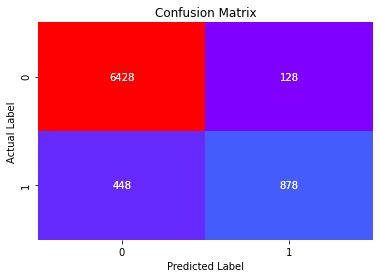

In [857]:
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


In [858]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6556
           1       0.87      0.66      0.75      1326

    accuracy                           0.93      7882
   macro avg       0.90      0.82      0.86      7882
weighted avg       0.92      0.93      0.92      7882



<Figure size 864x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

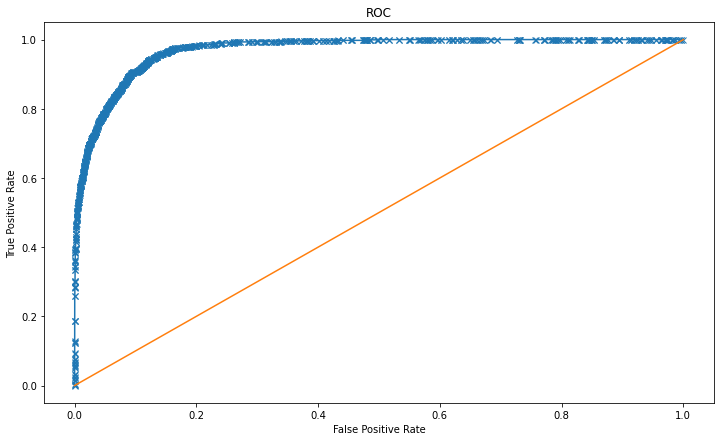

Area under Curve is 0.8213088398639128


In [859]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict(X_train)))

array([[2741,   67],
       [ 221,  349]], dtype=int64)

<AxesSubplot:>

Text(0.5, 15.0, 'Predicted Label')

Text(33.0, 0.5, 'Actual Label')

Text(0.5, 1.0, 'Confusion Matrix')

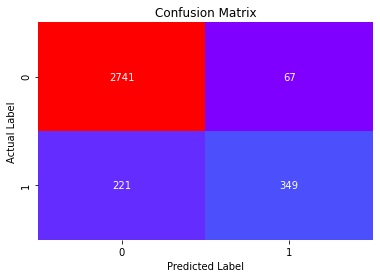

In [860]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [861]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2808
           1       0.84      0.61      0.71       570

    accuracy                           0.91      3378
   macro avg       0.88      0.79      0.83      3378
weighted avg       0.91      0.91      0.91      3378



<Figure size 864x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

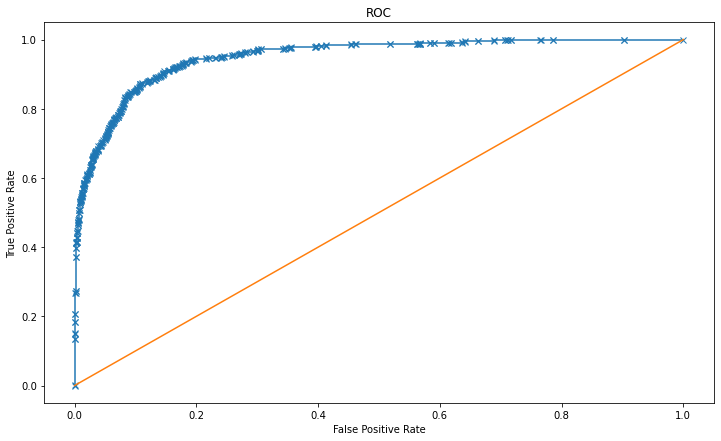

Area under Curve is 0.7942101514469936


In [862]:

#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict(X_test)))

### With SMOTE

In [863]:
param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier()

In [864]:
grid_search_SMOTE = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [865]:
grid_search_SMOTE.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [866]:
grid_search_SMOTE.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [869]:
best_grid1 = grid_search_SMOTE.best_estimator_
best_grid1

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=50)

In [870]:
ytrain_predict1 = best_grid.predict(X_train_res)
ytest_predict1 = best_grid.predict(X_test)

array([[6141,  415],
       [ 363, 6193]], dtype=int64)

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 15.0, 'Predicted Label')

Text(33.0, 0.5, 'Actual Label')

Text(0.5, 1.0, 'Confusion Matrix')

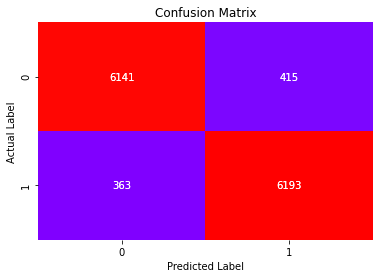

In [871]:
confusion_matrix(y_train_res,ytrain_predict)
sns.heatmap(confusion_matrix(y_train_res,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
sns.heatmap(confusion_matrix(y_train_res,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


In [872]:

print(classification_report(y_train_res,ytrain_predict))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6556
           1       0.94      0.94      0.94      6556

    accuracy                           0.94     13112
   macro avg       0.94      0.94      0.94     13112
weighted avg       0.94      0.94      0.94     13112



<Figure size 864x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

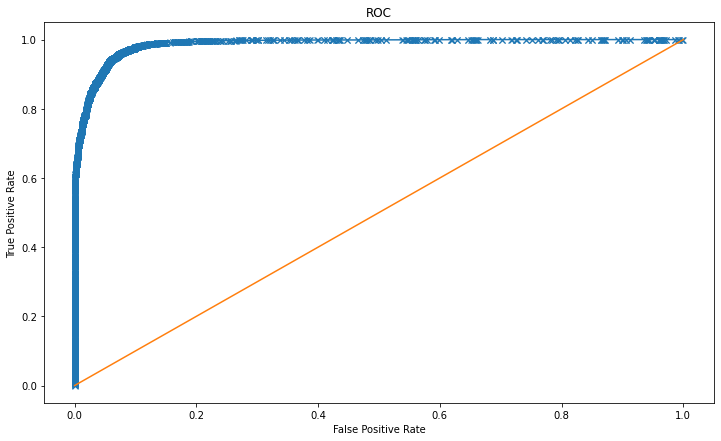

Area under Curve is 0.9406650396583283


array([[2619,  189],
       [ 129,  441]], dtype=int64)

<AxesSubplot:>

Text(0.5, 15.0, 'Predicted Label')

Text(33.0, 0.5, 'Actual Label')

Text(0.5, 1.0, 'Confusion Matrix')

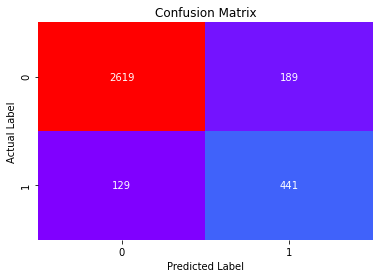

In [873]:

#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train_res,best_grid.predict_proba(X_train_res)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train_res,best_grid.predict(X_train_res)))



confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2808
           1       0.70      0.77      0.73       570

    accuracy                           0.91      3378
   macro avg       0.83      0.85      0.84      3378
weighted avg       0.91      0.91      0.91      3378



<Figure size 864x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC')

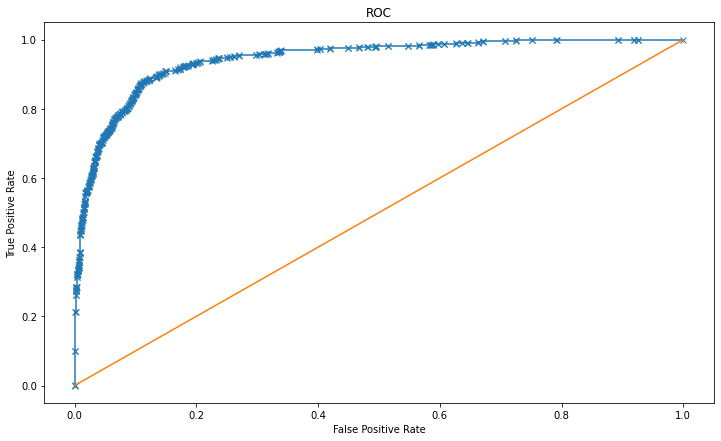

Area under Curve is 0.8531882591093117


In [874]:

print(classification_report(y_test,ytest_predict))



#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict(X_test)))


### ADA Boosting with Gradient Boosting and SMOTE

In [875]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train_res,y_train_res)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [876]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train_res)
model_score = ADB_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9015405735204393
[[5940  616]
 [ 675 5881]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      6556
           1       0.91      0.90      0.90      6556

    accuracy                           0.90     13112
   macro avg       0.90      0.90      0.90     13112
weighted avg       0.90      0.90      0.90     13112



In [877]:

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train_res, y_train_res)

In [878]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train_res)
model_score = gbcl.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9301403294691886
[[6120  436]
 [ 480 6076]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6556
           1       0.93      0.93      0.93      6556

    accuracy                           0.93     13112
   macro avg       0.93      0.93      0.93     13112
weighted avg       0.93      0.93      0.93     13112



In [879]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8975725281231498
[[2622  186]
 [ 160  410]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2808
           1       0.69      0.72      0.70       570

    accuracy                           0.90      3378
   macro avg       0.82      0.83      0.82      3378
weighted avg       0.90      0.90      0.90      3378



### KNN model tuning with SMOTE

In [891]:
# empty list that will hold accuracy scores
tr_scores = []
ts_scores = []
mce = []


In [892]:
# perform accuracy metrics for values from 1,3,5....49
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res, y_train_res)
    # evaluate test accuracy
    tr_scores.append(round(knn.score(X_train_res,y_train_res),3))
    ts_scores.append(round(knn.score(X_test,y_test),3))
    mce.append(round(knn.score(X_test,y_test),3))

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=29)

KNeighborsClassifier(n_neighbors=31)

KNeighborsClassifier(n_neighbors=33)

KNeighborsClassifier(n_neighbors=35)

KNeighborsClassifier(n_neighbors=37)

KNeighborsClassifier(n_neighbors=39)

KNeighborsClassifier(n_neighbors=41)

KNeighborsClassifier(n_neighbors=43)

KNeighborsClassifier(n_neighbors=45)

KNeighborsClassifier(n_neighbors=47)

KNeighborsClassifier(n_neighbors=49)

In [893]:
result = pd.DataFrame({'k_val': range(1,50,2),
              'train_acc':tr_scores,
              'test_acc':ts_scores,         
              'error':mce,})
result['tr_ts_diff'] = abs(result['train_acc'] - result['test_acc'])
result['k_opt'] = np.where((result['tr_ts_diff']<0.10)&(result['train_acc']>result['test_acc']),1,0)
result[result['k_opt'] == 1] 
print(metrics.confusion_matrix(y_test,ytest_predict_KNN))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_KNN),'\n')

,k_val,train_acc,test_acc,error,tr_ts_diff,k_opt
13,27,0.841,0.742,0.742,0.099,1
14,29,0.839,0.742,0.742,0.097,1
15,31,0.836,0.744,0.744,0.092,1
16,33,0.832,0.742,0.742,0.090,1
17,35,0.828,0.740,0.740,0.088,1
18,37,0.826,0.739,0.739,0.087,1
19,39,0.822,0.738,0.738,0.084,1
20,41,0.819,0.738,0.738,0.081,1
21,43,0.816,0.736,0.736,0.080,1
22,45,0.815,0.735,0.735,0.080,1


[[2713   95]
 [ 339  231]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2808
           1       0.71      0.41      0.52       570

    accuracy                           0.87      3378
   macro avg       0.80      0.69      0.72      3378
weighted avg       0.86      0.87      0.86      3378
 



In [894]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=7)

In [895]:
# Training Data Class Prediction with a cut-off vaue of 0.5
ytrain_predict_KNN = KNN_model.predict(X_train_res)

In [896]:
# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_KNN = KNN_model.predict(X_test)

In [897]:
KNN_model_score_train=KNN_model.score(X_train_res,y_train_res)
print("Train Efficency:",KNN_model_score_train)
print(metrics.confusion_matrix(y_train_res,ytrain_predict_KNN))
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,ytrain_predict_KNN),'\n')
KNN_model_score_test=KNN_model.score(X_test,y_test)
print("Test Efficency:",KNN_model_score_test)
print(metrics.confusion_matrix(y_test,ytest_predict_KNN))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_KNN),'\n')

Train Efficency: 0.9109975594874924
[[5442 1114]
 [  53 6503]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.99      0.83      0.90      6556
           1       0.85      0.99      0.92      6556

    accuracy                           0.91     13112
   macro avg       0.92      0.91      0.91     13112
weighted avg       0.92      0.91      0.91     13112
 

Test Efficency: 0.7978093546477205
[[2202  606]
 [  77  493]]
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.78      0.87      2808
           1       0.45      0.86      0.59       570

    accuracy                           0.80      3378
   macro avg       0.71      0.82      0.73      3378
weighted avg       0.88      0.80      0.82      3378
 

